In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture
from sklearn.metrics import silhouette_score, silhouette_samples

import time

# **Case 2**

## Exploratory Data Analysis (EDA)
EDA - Eelectrodermal Activity

HR - Heart Rate

TEMP - Temperature

BVP - Blood Volume Pulse


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-data/HR_data.csv


In [3]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows', None)

In [4]:
# Read the data and drop unwanted columns
HR_data = pd.read_csv('/kaggle/input/hr-data/HR_data.csv')
HR_data = HR_data.drop(columns=['Unnamed: 0'])
HR_data.head()

HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0   78.663878         76.70   7.480043      67.25      92.48  23048.450   
1   76.540732         76.61   2.584756      69.82      82.33  23959.920   
2   78.173563         77.92   2.681255      72.22      82.80  20324.605   
3   83.073688         83.88   7.363598      69.42      96.12  24924.300   
4   72.281250         72.91   3.193762      64.95      79.98  23052.100   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  \
0       -1.091448    0.369955          -0.7300           0.9775   
1       -0.245338    0.338732          -0.3600           0.1900   
2       -0.615922   -0.233047          -0.6300           0.3575   
3       -0.866610   -0.046021          -0.4650           0.6500   
4        0.200401   -0.560948          -0.3725           0.3375   

   HR_TD_Slope_mean  HR_TD_Slope  TEMP_TD_Mean  TEMP_TD_Median  TEMP_TD_std  \
0          0.044590     0.046701     31.090000           31.11     0.163895   
1         -0.028095    -0.024148     30.937293           30.93     0.083766   
2         -0.024202    -0.026008     30.735341           30.75     0.078038   
3          0.021375     0.021477     30.505025           30.29     0.366089   
4         -0.013555    -0.012871     30.332578           30.35     0.110119   

   TEMP_TD_Min  TEMP_TD_Max  TEMP_TD_AUC  TEMP_TD_Kurtosis  TEMP_TD_Skew  \
0        30.59        31.31     36593.14          1.349570     -1.352915   
1        30.81        31.17     38826.24          0.177872      0.898894   
2        30.59        30.89     31964.72         -0.956503     -0.143041   
3        30.11        31.15     36758.35         -1.513910      0.503921   
4        30.11        30.53     38795.38         -1.456255     -0.171929   

   TEMP_TD_Slope_min  TEMP_TD_Slope_max  TEMP_TD_Slope_mean  TEMP_TD_Slope  \
0          -0.002286           0.000377           -0.000589      -0.000455   
1          -0.001062           0.000714            0.000232       0.000241   
2          -0.000962           0.000777           -0.000085      -0.000155   
3          -0.000556           0.002963            0.000667       0.000704   
4          -0.000962           0.000192           -0.000314      -0.000300   

   EDA_TD_P_Mean  EDA_TD_P_Median  EDA_TD_P_std  EDA_TD_P_Min  EDA_TD_P_Max  \
0       0.000172         0.000006      0.000927     -0.006185      0.007375   
1       0.000489         0.000035      0.001138      0.000000      0.008462   
2       0.000155         0.000002      0.000444      0.000000      0.005550   
3       0.000673         0.000018      0.001829      0.000000      0.012784   
4       0.001164         0.000074      0.002936     -0.001992      0.022954   

   EDA_TD_P_AUC  EDA_TD_P_Kurtosis  EDA_TD_P_Skew  EDA_TD_P_Slope_min  \
0      0.202712          28.467716       1.091696           -0.000200   
1      0.614382          18.455509       3.948751           -0.000273   
2      0.161122          36.768442       5.151764           -0.000045   
3      0.811271          19.045235       4.165664           -0.000271   
4      1.484085          20.998111       4.209074           -0.000646   

   EDA_TD_P_Slope_max  EDA_TD_P_Slope_mean  EDA_TD_P_Slope  EDA_TD_T_Mean  \
0            0.000198            -0.000004    4.360220e-06       0.181286   
1            0.000451             0.000001   -2.617585e-06       0.169909   
2            0.000054            -0.000001   -1.084815e-06       0.166798   
3            0.000309             0.000002   -5.062888e-08       0.159292   
4            0.000639             0.000005    1.344367e-05       0.150387   

   EDA_TD_T_Median  EDA_TD_T_std  EDA_TD_T_Min  EDA_TD_T_Max  EDA_TD_T_AUC  \
0         0.182695      0.003744      0.169440      0.186816    213.374114   
1         0.169617      0.002976      0.164504      0.179273    213.235380   
2         0.166706      0.002266      0.162036      0.172624    173.465157   
3         0.158034      0.004789      0.148368      0.17549

In [5]:
# Make a brief and automatic description of the data
HR_data.describe()

HR_TD_Mean  HR_TD_Median   HR_TD_std   HR_TD_Min   HR_TD_Max  \
count  312.000000    312.000000  312.000000  312.000000  312.000000   
mean    78.549974     77.452869    6.545680   68.778365   92.451122   
std     11.382695     12.093798    4.998885    9.341107   17.759683   
min     57.606118     54.130000    0.834390   49.000000   67.200000   
25%     71.061238     69.971250    3.160342   62.192500   80.207500   
50%     76.784284     75.600000    4.919862   67.565000   87.830000   
75%     83.566296     83.108750    8.006694   73.805000   99.452500   
max    151.942434    167.950000   32.155396  111.070000  172.470000   

          HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  \
count    312.000000      312.000000  312.000000       312.000000   
mean   24307.558590       -0.054661    0.375978        -0.567952   
std     4035.278119        1.671170    0.823875         0.391239   
min    14853.260000       -1.644825   -2.230501        -3.366000   
25%    21549.048750       -0.984473   -0.151022        -0.665208   
50%    23650.430000       -0.456978    0.361195        -0.457500   
75%    26543.927500        0.216412    0.988498        -0.317500   
max    46069.990000       12.510032    3.225347        -0.112500   

       HR_TD_Slope_max  HR_TD_Slope_mean  HR_TD_Slope  TEMP_TD_Mean  \
count       312.000000        312.000000   312.000000    312.000000   
mean          0.518478         -0.013455    -0.013991     32.905322   
std           0.470043          0.051248     0.051847      1.642753   
min           0.075000         -0.230410    -0.229441     29.320985   
25%           0.292500         -0.030541    -0.031037     31.669438   
50%           0.412500         -0.009660    -0.011269     32.842251   
75%           0.613750          0.007131     0.006753     34.392584   
max           6.202500          0.167452     0.172490     35.643317   

       TEMP_TD_Median  TEMP_TD_std  TEMP_TD_Min  TEMP_TD_Max   TEMP_TD_AUC  \
count      312.000000   312.000000   312.000000   312.000000    312.000000   
mean        32.902452     0.108484    32.703622    33.114712  40875.088077   
std          1.645406     0.094302     1.652112     1.639815   4342.367968   
min         29.290000     0.012927    29.190000    29.490000  28157.070000   
25%         31.660000     0.048763    31.500000    31.830000  39074.667500   
50%         32.835000     0.079660    32.655000    33.110000  40850.157500   
75%         34.405000     0.132232    34.130000    34.672500  42412.961250   
max         35.650000     0.636475    35.590000    35.790000  62791.935000   

       TEMP_TD_Kurtosis  TEMP_TD_Skew  TEMP_TD_Slope_min  TEMP_TD_Slope_max  \
count        312.000000    312.000000         312.000000         312.000000   
mean          -0.440241     -0.004733          -0.000802           0.000835   
std            1.048376      0.655546           0.000792           0.000857   
min           -1.672291     -2.729638          -0.004630          -0.000360   
25%           -1.103117     -0.435519          -0.001091           0.000347   
50%           -0.761808      0.021963          -0.000556           0.000556   
75%           -0.097780      0.403396          -0.000280           0.001081   
max            7.050239      1.804922           0.000833           0.007523   

       TEMP_TD_Slope_mean  TEMP_TD_Slope  EDA_TD_P_Mean  EDA_TD_P_Median  \
count          312.000000     312.000000     312.000000     3.120000e+02   
mean             0.000031       0.000033       0.417961     3.156960e-01   
std              0.000314       0.000304       1.049395     1.023568e+00   
min             -0.000953      -0.000889       0.000068     4.079181e-08   
25%             -0.000135      -0.000131       0.013651     3.213445e-03   
50%              0.000009       0.000016       0.076943     2.084825e-02   
75%              0.000173       0.000164       0.258301     1.083515e-01   
max              0.001551       0.001472       7.199828     7.500025e+00   

       EDA_TD_

In [6]:
# Display the number of NaN values per column.
pd.set_option('display.max_rows', None)
null_counts = HR_data.isnull().sum()
null_counts
# Are they all valid? Yes, they are! 

HR_TD_Mean             0
HR_TD_Median           0
HR_TD_std              0
HR_TD_Min              0
HR_TD_Max              0
HR_TD_AUC              0
HR_TD_Kurtosis         0
HR_TD_Skew             0
HR_TD_Slope_min        0
HR_TD_Slope_max        0
HR_TD_Slope_mean       0
HR_TD_Slope            0
TEMP_TD_Mean           0
TEMP_TD_Median         0
TEMP_TD_std            0
TEMP_TD_Min            0
TEMP_TD_Max            0
TEMP_TD_AUC            0
TEMP_TD_Kurtosis       0
TEMP_TD_Skew           0
TEMP_TD_Slope_min      0
TEMP_TD_Slope_max      0
TEMP_TD_Slope_mean     0
TEMP_TD_Slope          0
EDA_TD_P_Mean          0
EDA_TD_P_Median        0
EDA_TD_P_std           0
EDA_TD_P_Min           0
EDA_TD_P_Max           0
EDA_TD_P_AUC           0
EDA_TD_P_Kurtosis      0
EDA_TD_P_Skew          0
EDA_TD_P_Slope_min     0
EDA_TD_P_Slope_max     0
EDA_TD_P_Slope_mean    0
EDA_TD_P_Slope         0
EDA_TD_T_Mean          0
EDA_TD_T_Median        0
EDA_TD_T_std           0
EDA_TD_T_Min           0


In [7]:
# Calculate the rounded mean of numeric columns
# (para imputar valores enteros en las variables de sentimientos, que son las únicas con valores nulls)
rounded_mean = HR_data.select_dtypes(include='number').mean().round()

# Replace null values with the rounded mean of each column
HR_data = HR_data.fillna(rounded_mean)

<Axes: >

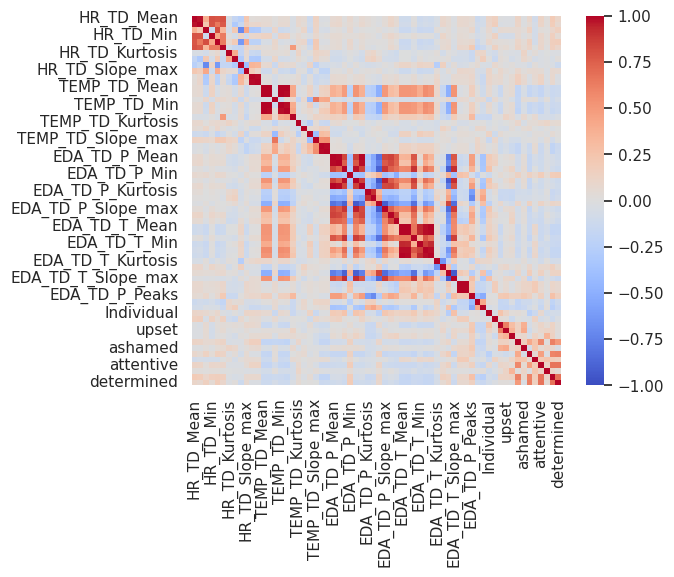

In [8]:
numerical_data = HR_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the diagonal elements to False to include them
np.fill_diagonal(mask, False)



# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", vmin=-1, vmax=1, square=True)


In [9]:
pd.reset_option('display.max_rows', None)

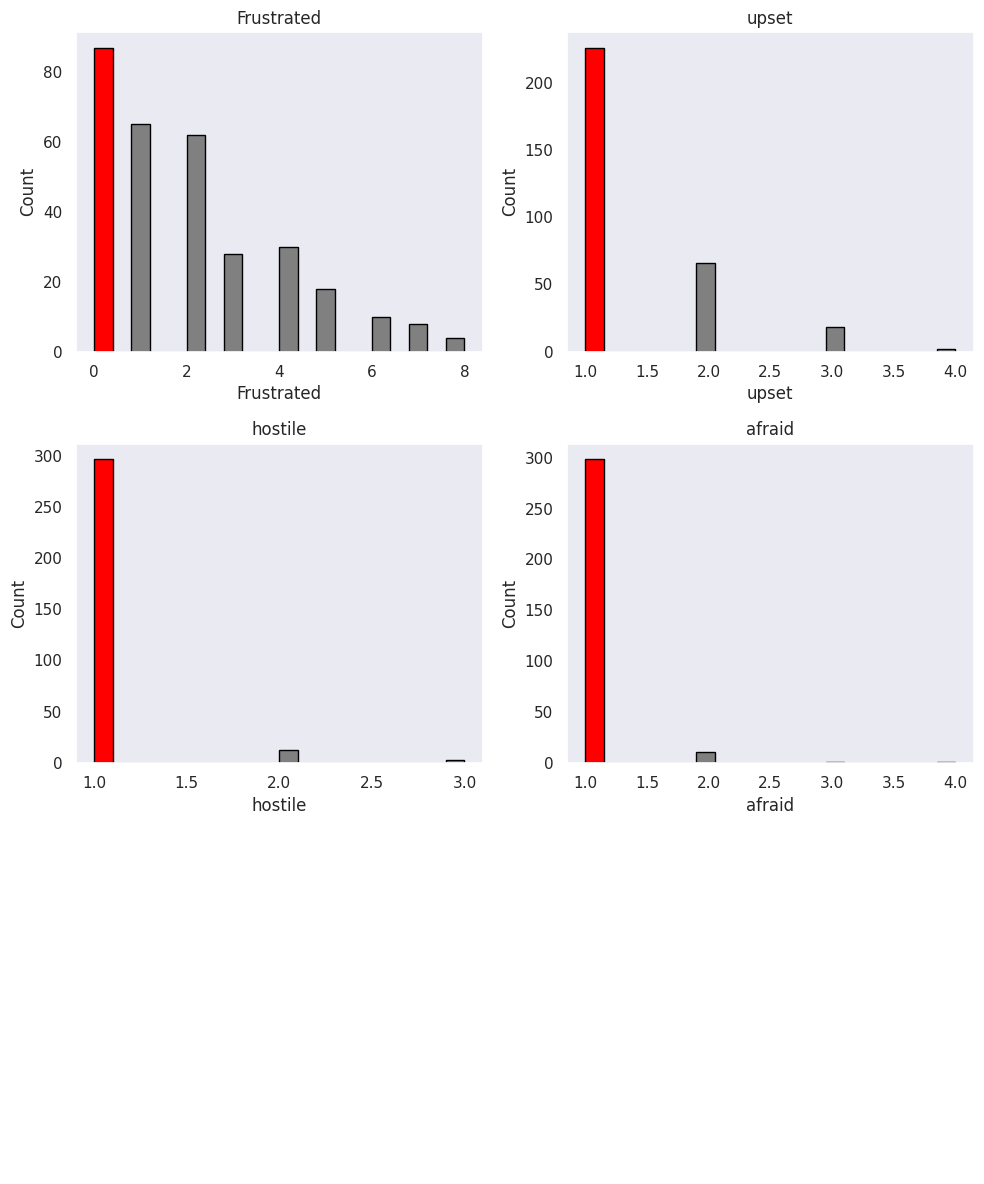

In [10]:
# Define columns to plot
columns_to_plot = ['Frustrated', 'upset', 'hostile', 'afraid']

# Plot histograms for each variable
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Flatten the axs array for easy indexing
axs = axs.flatten()

for idx, column in enumerate(columns_to_plot):
    # Plot histogram
    counts, bins, _ = axs[idx].hist(HR_data[column], bins=20, color='gray', edgecolor='black')
    
    # Find bin with highest count
    max_count_bin = np.argmax(counts)
    
    # Highlight the bar with highest count in red
    axs[idx].patches[max_count_bin].set_facecolor('red')
    axs[idx].grid(False)
    axs[idx].set_title(column)
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel('Count')

# Hide the remaining empty subplots
for i in range(len(columns_to_plot), len(axs)):
    axs[i].axis('off')
plt.tight_layout()
plt.savefig('emotionsdistributions')
plt.show()


In [11]:
unique_individuals_by_cohort = HR_data.groupby('Cohort')['Individual'].unique()
unique_individuals_by_cohort

Cohort
D1_1    [7, 8, 9, 10, 11, 12, 13, 14]
D1_2         [15, 16, 17, 18, 19, 20]
D1_3                 [21, 22, 23, 24]
D1_4                     [1, 2, 3, 4]
D1_5                         [25, 26]
D1_6                           [5, 6]
Name: Individual, dtype: object

# Silhouette analysis (Andrea)

In [12]:
def plot_silhouette(X, cluster_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    
    # Initialize variables for plotting
    y_lower = 10
    n_clusters = len(np.unique(cluster_labels))
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "the average silhouette_score is:\n---", silhouette_avg, "---")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Clear the yaxis labels / ticks
    plt.yticks([])
    
    # 2nd plot with clusters
    color = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=color, edgecolor="k")
    centers = kmeans.cluster_centers_
    
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

# Sentiment Analysis (Estel)

{0: {'phase1': 0, 'phase2': 0}, 1: {'phase1': 0, 'phase2': 0}}


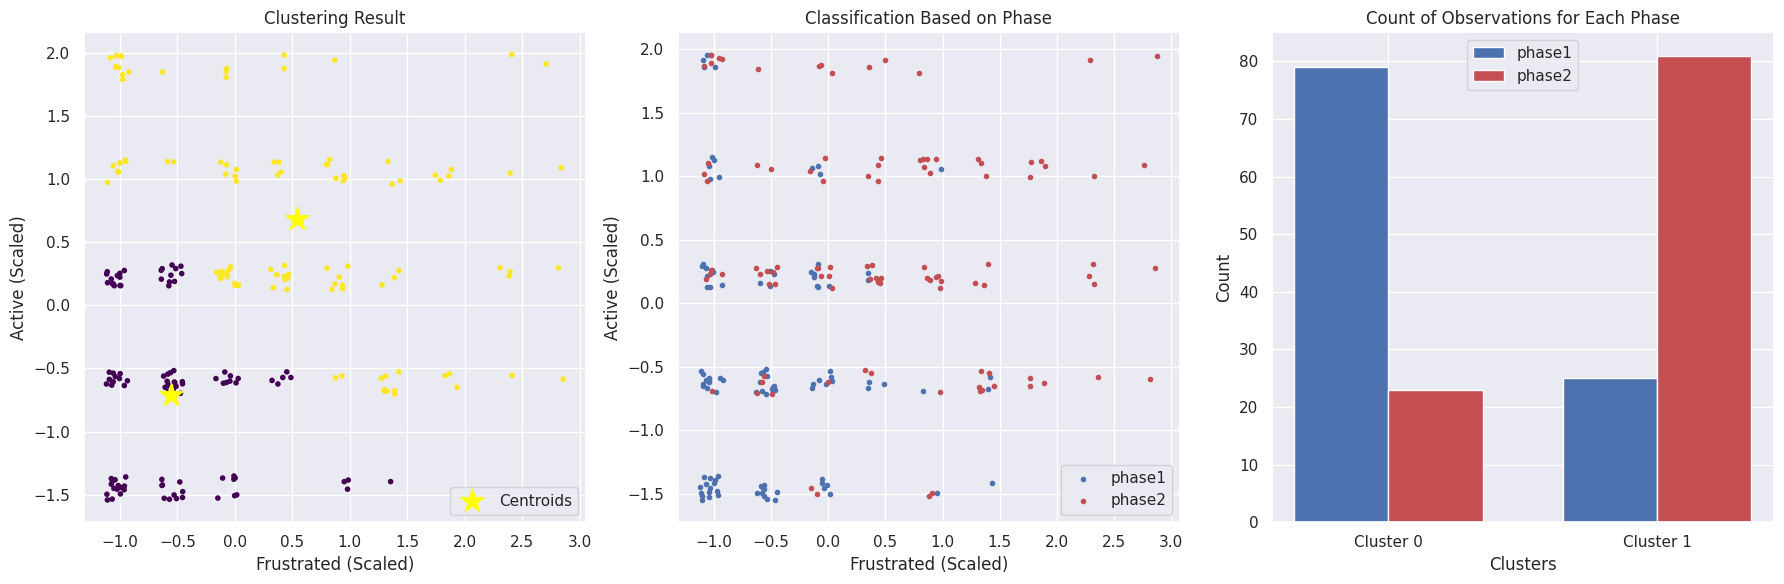

In [13]:
#ALL ROUNDS
phase1_2_data = HR_data[HR_data['Phase'].isin(['phase1', 'phase2'])]
phase1_2_data

color_map = {'phase1': 'b', 'phase2': 'r'}

# Instantiate StandardScaler
scaler = StandardScaler()
    
    # Scale the data for the current round
scaled_data = scaler.fit_transform(phase1_2_data[['Frustrated', 'active']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=1, random_state=1, max_iter=1)
y_pred = kmeans.fit_predict(scaled_data)

# Count observations for each phase within each cluster
cluster_counts = {i: {'phase1': 0, 'phase2': 0} for i in range(len(np.unique(y_pred)))} #inicialitza el diccionari de counts
print(cluster_counts)
for phase, color in color_map.items():
    phase_data = phase1_2_data[phase1_2_data['Phase'] == phase]
    for cluster in np.unique(y_pred):
        cluster_counts[cluster][phase] = np.sum(y_pred[phase1_2_data['Phase'] == phase] == cluster)

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Add jitter to the scatterplot
jitter_amount = 0.1  # Adjust this value based on your preference

jittered_scaled_data = scaled_data + np.random.uniform(-jitter_amount, jitter_amount, size=scaled_data.shape)

# Plot clustering results with jitter
axs[0].scatter(jittered_scaled_data[:, 0], jittered_scaled_data[:, 1], c=y_pred, marker='.', cmap='viridis')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
axs[0].set_xlabel('Frustrated (Scaled)')
axs[0].set_ylabel('Active (Scaled)')
axs[0].set_title(f"Clustering Result")
axs[0].legend()

# Add jitter to the scatterplot for classification based on phase
for phase, color in color_map.items():
    subset = phase1_2_data[phase1_2_data['Phase'] == phase]
    scaled_subset = scaler.transform(subset[['Frustrated', 'active']])
    jittered_scaled_subset = scaled_subset + np.random.uniform(-jitter_amount, jitter_amount, size=scaled_subset.shape)
    axs[1].scatter(jittered_scaled_subset[:, 0], jittered_scaled_subset[:, 1], c=color, marker='.', label=phase)

axs[1].set_xlabel('Frustrated (Scaled)')
axs[1].set_ylabel('Active (Scaled)')
axs[1].set_title(f"Classification Based on Phase")
axs[1].legend()

# Plot count of observations for each phase within each cluster
cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
phase_labels = list(color_map.keys())
cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]

bar_width = 0.35
bar_positions = np.arange(len(cluster_labels))

for i, phase in enumerate(phase_labels):
    axs[2].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)

axs[2].set_xlabel('Clusters')
axs[2].set_ylabel('Count')
axs[2].set_title(f"Count of Observations for Each Phase")
axs[2].set_xticks(bar_positions)
axs[2].set_xticklabels(cluster_labels)
axs[2].legend()

# Show plot
plt.tight_layout()
plt.show()


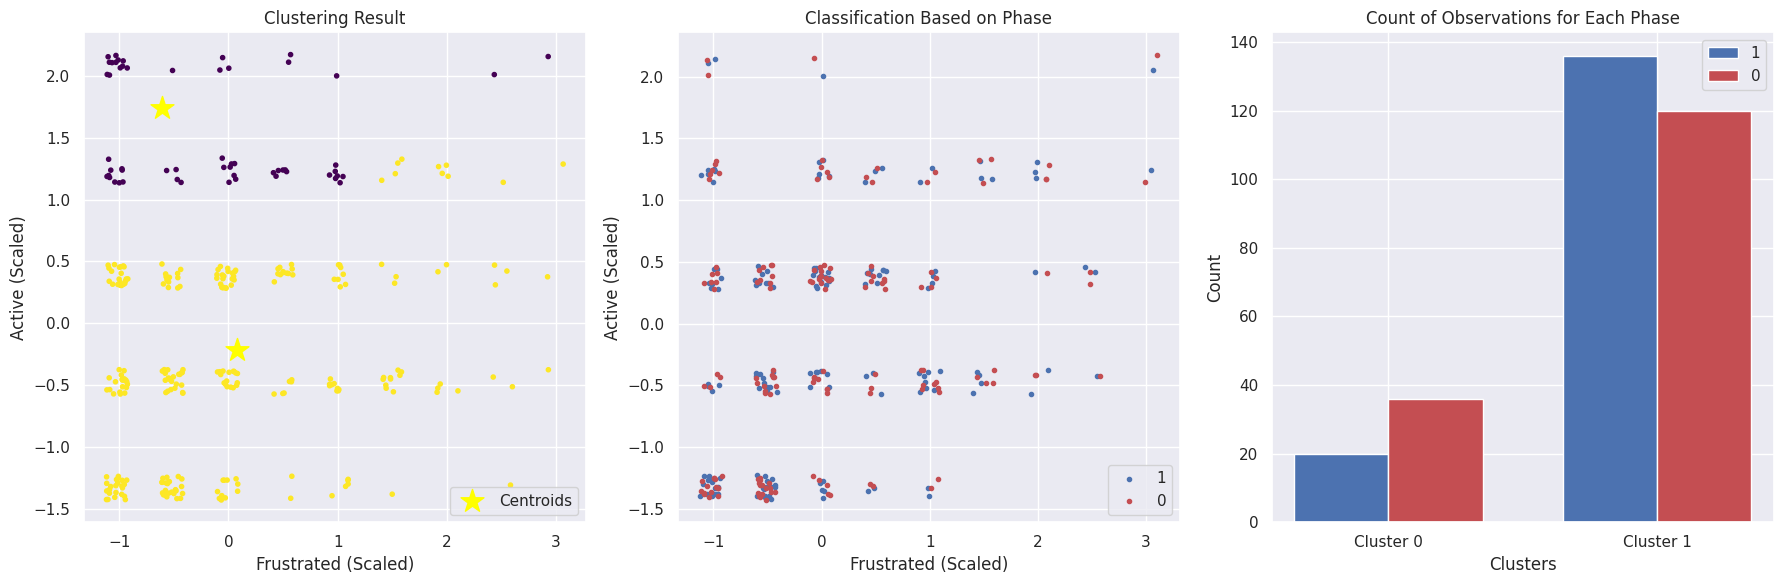

In [14]:
# PUZZLER


#ALL ROUNDS
puzzler_data = HR_data[HR_data['Puzzler'].isin([1,0])]
puzzler_data

color_map = {1: 'b', 0: 'r'}

# Unique round values
#unique_rounds = phase1_2_data['Round'].unique()

# Instantiate StandardScaler
scaler = StandardScaler()

# Iterate over each round
#for current_round in unique_rounds:
    #round_data = phase1_2_data[phase1_2_data['Round'] == current_round]
    
    # Scale the data for the current round
scaled_data = scaler.fit_transform(puzzler_data[['Frustrated', 'active']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=1, random_state=1, max_iter=1)
y_pred = kmeans.fit_predict(scaled_data)

# Count observations for each phase within each cluster
cluster_counts = {i: {'puzzlersi': 0, 'puzzlerno': 0} for i in range(len(np.unique(y_pred)))}

for puzzler, color in color_map.items():
    puzzzler_data = puzzler_data[puzzler_data['Puzzler'] == puzzler]
    for cluster in np.unique(y_pred):
        cluster_counts[cluster][puzzler] = np.sum(y_pred[puzzler_data['Puzzler'] == puzzler] == cluster)

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

jitter_amount = 0.1  # Adjust this value based on your preference

jittered_scaled_data = scaled_data + np.random.uniform(-jitter_amount, jitter_amount, size=scaled_data.shape)

# Plot clustering results with jitter
axs[0].scatter(jittered_scaled_data[:, 0], jittered_scaled_data[:, 1], c=y_pred, marker='.', cmap='viridis')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
axs[0].set_xlabel('Frustrated (Scaled)')
axs[0].set_ylabel('Active (Scaled)')
axs[0].set_title(f"Clustering Result")
axs[0].legend()

# Add jitter to the scatterplot for classification based on phase
for puzzler, color in color_map.items():
    subset = puzzler_data[puzzler_data['Puzzler'] == 1]
    scaled_subset = scaler.transform(subset[['Frustrated', 'active']])
    jittered_scaled_subset = scaled_subset + np.random.uniform(-jitter_amount, jitter_amount, size=scaled_subset.shape)
    axs[1].scatter(jittered_scaled_subset[:, 0], jittered_scaled_subset[:, 1], c=color, marker='.', label=puzzler)

axs[1].set_xlabel('Frustrated (Scaled)')
axs[1].set_ylabel('Active (Scaled)')
axs[1].set_title(f"Classification Based on Phase")
axs[1].legend()

# Plot count of observations for each phase within each cluster
cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
phase_labels = list(color_map.keys())
cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]

bar_width = 0.35
bar_positions = np.arange(len(cluster_labels))

for i, phase in enumerate(phase_labels):
    axs[2].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)

axs[2].set_xlabel('Clusters')
axs[2].set_ylabel('Count')
axs[2].set_title(f"Count of Observations for Each Phase")
axs[2].set_xticks(bar_positions)
axs[2].set_xticklabels(cluster_labels)
axs[2].legend()

# Show plot
plt.tight_layout()
plt.show()


### Now the same study but with Hierarchical Clustering
**Agglomerative** (bottom-up): Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

A dendrogram is a diagram that shows the hierarchical relationship between objects.

At the lowest level will be individual elements and then they are grouped according to attributes at higher levels. The end of each branch is the data.

The y-axis (the height of the branch) shows how close data points or clusters are from one another. The taller the branch, the further and more different the clusters are.

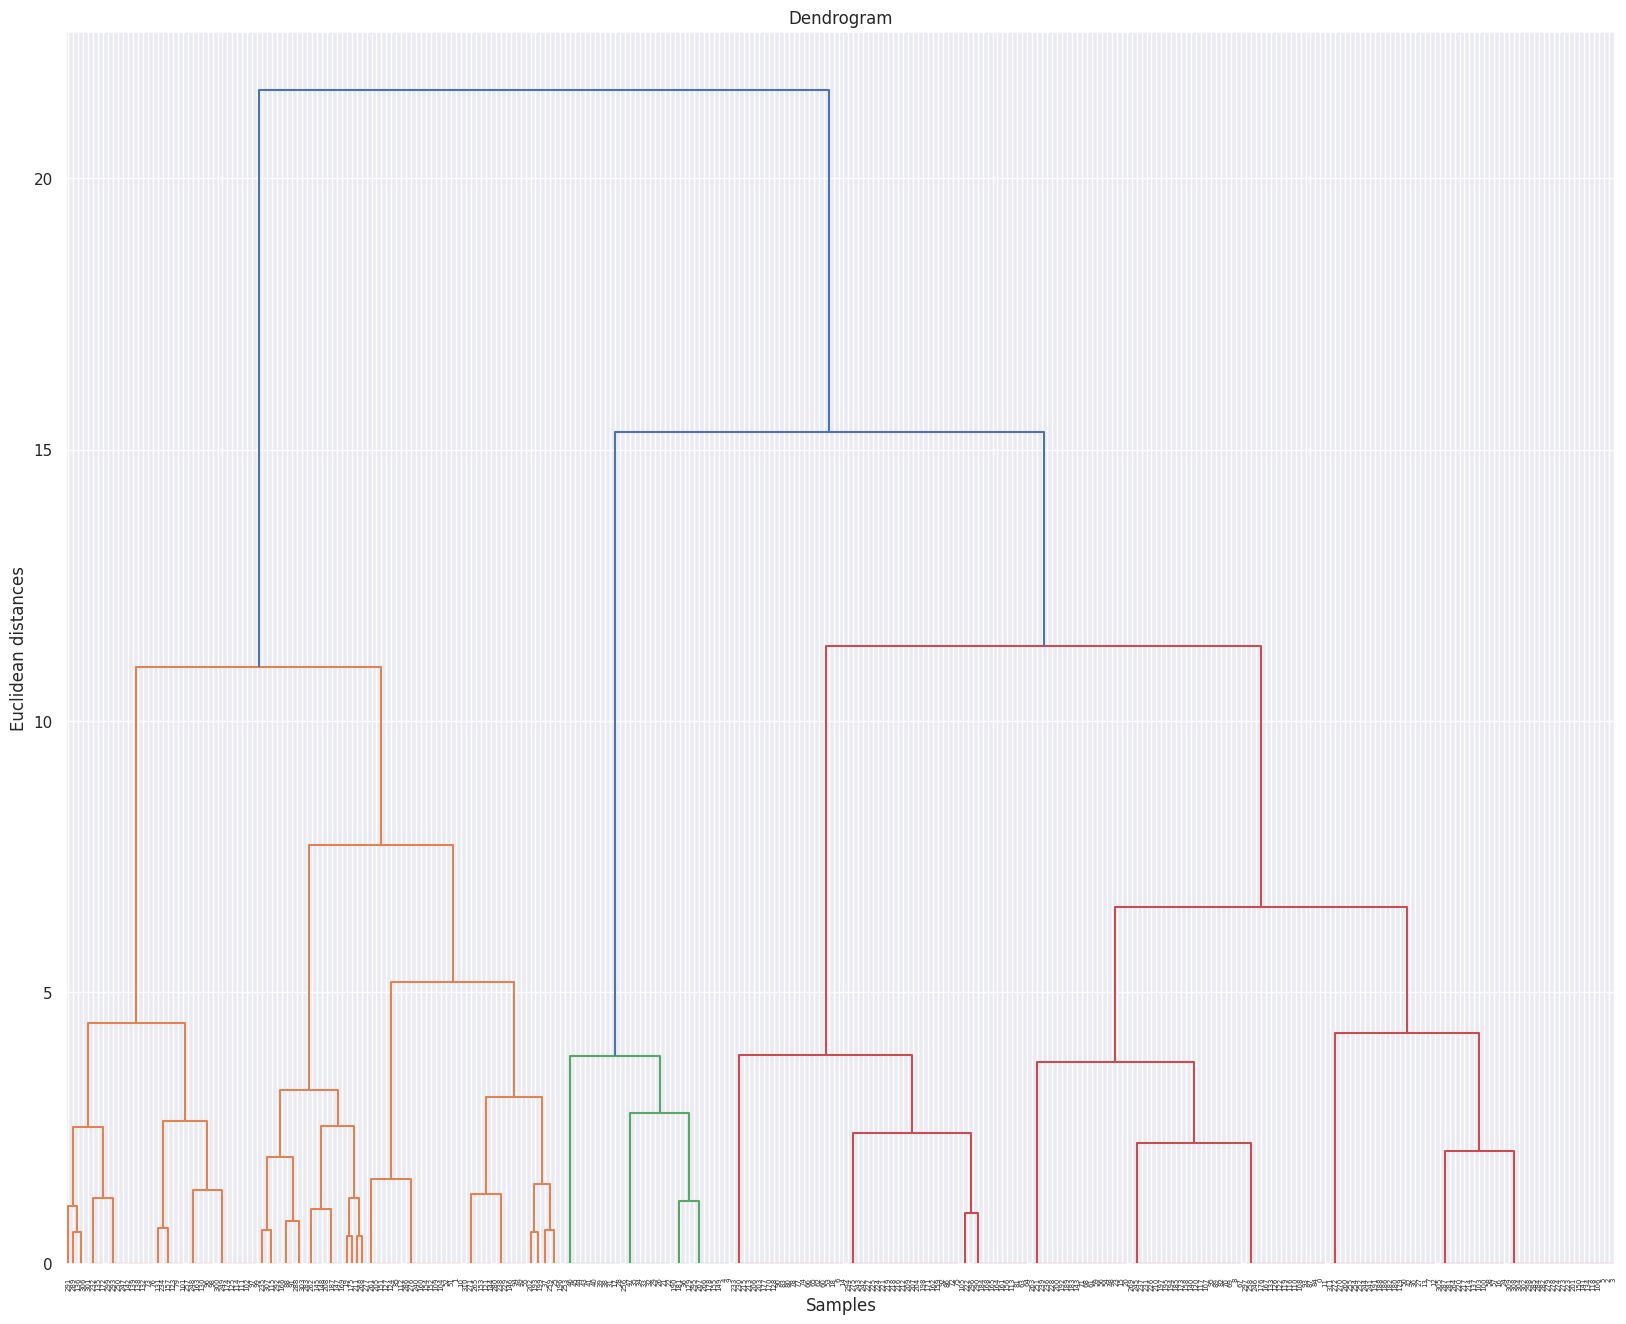

In [15]:
#Import the AgglomerativeClustering and silhouette_score modules from the scikit-learn library
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

#Create a figure with size 20x16
plt.figure(1, figsize = (20 ,16))

selected_HR_data = HR_data[['Frustrated', 'active']]
scaler = StandardScaler()
# Scale the variables
scaled_data = scaler.fit_transform(selected_HR_data)

#Create a dendrogram using the linkage method with the X_unsupervised data
Dendrogram = shc.dendrogram((shc.linkage(scaled_data, method ='ward')))

#Label the graph
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

#Show the plot
plt.show()

In [16]:
hierarchical_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(scaled_data)

labels = hierarchical_model.labels_
clusters = hierarchical_model.fit_predict(scaled_data)

# Max score: 1.  Min score: -1 (wrong assignations). Scores near 0 indicate overlapping clusters
score = silhouette_score(scaled_data, hierarchical_model.labels_, metric='euclidean')
print(score)

0.3896871874499387


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Now we fit the Hierarchical clustering with 2 clusters to the data and calculate the Silhouette score, which retrieves a value of 0.39, suggesting that the clustering result is reasonable, indicating that the clusters are distinct and well-separated, but there is still room for improvement.

Silhouette Score:  0.35672071447899145


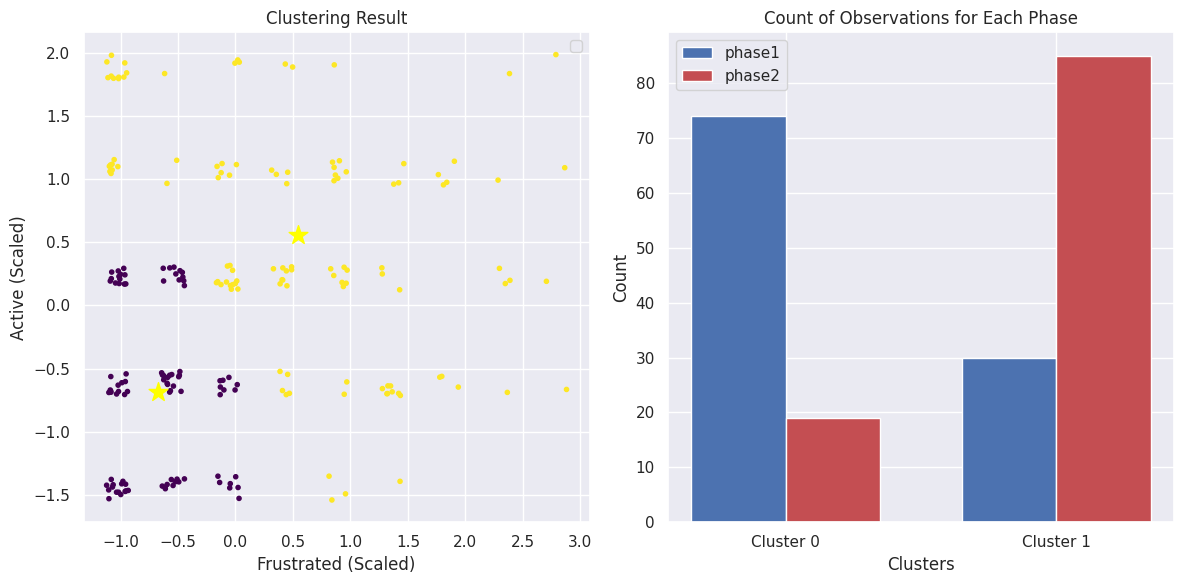

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Filter data for phases 1 and 2
phase1_2_data = HR_data[HR_data['Phase'].isin(['phase1', 'phase2'])]

# Define colors for each phase
color_map = {'phase1': 'b', 'phase2': 'r'}

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(phase1_2_data[['Frustrated', 'active']])

# Perform Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(scaled_data)
y_pred = hierarchical_model.fit_predict(scaled_data)

# Swap cluster labels
y_pred = 1 - y_pred

# Calculate silhouette score
score = silhouette_score(scaled_data, hierarchical_model.labels_, metric='euclidean')
print("Silhouette Score: ", score)

# Count observations for each phase within each cluster
cluster_counts = {i: {'phase1': 0, 'phase2': 0} for i in range(len(np.unique(y_pred)))}
for phase, color in color_map.items():
    for cluster in np.unique(y_pred):
        cluster_counts[cluster][phase] = np.sum(y_pred[phase1_2_data['Phase'] == phase] == cluster)

# Create figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot clustering results with jitter
jitter = 0.1
axs[0].scatter(scaled_data[:, 0] + np.random.uniform(low=-jitter, high=jitter, size=scaled_data.shape[0]),
                scaled_data[:, 1] + np.random.uniform(low=-jitter, high=jitter, size=scaled_data.shape[0]),
                c=y_pred, marker='.', cmap='viridis')
axs[0].set_xlabel('Frustrated (Scaled)')
axs[0].set_ylabel('Active (Scaled)')
axs[0].set_title(f"Clustering Result")
axs[0].legend()

# Calculate and plot cluster centers as yellow stars
cluster_centers = np.zeros((len(np.unique(y_pred)), scaled_data.shape[1]))
for i, cluster_label in enumerate(np.unique(y_pred)):
    cluster_centers[i] = np.mean(scaled_data[y_pred == cluster_label], axis=0)

axs[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', marker='*', s=200, label='Cluster Centers')

# Plot count of observations for each phase within each cluster
cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
phase_labels = list(color_map.keys())
cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]

bar_width = 0.35
bar_positions = np.arange(len(cluster_labels))

for i, phase in enumerate(phase_labels):
    axs[1].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)

axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Count')
axs[1].set_title(f"Count of Observations for Each Phase")
axs[1].set_xticks(bar_positions)
axs[1].set_xticklabels(cluster_labels)
axs[1].legend()

# Show plot
plt.tight_layout()
plt.show()


As we can see, the results of this Hierarchical Clustering are very similar to the ones retrieved by the k-means.

# Stress Biomarkers (Physiological Signals) (Adrià)

### Perform k-means clustering on the mean values of the Biosensor data

In [18]:
def plotting(X, kmeans, y_pred, ax):
    ax.clear()
    ax.scatter(X[:,0], X[:,1], c = y_pred, marker= ".", cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = np.arange(kmeans.cluster_centers_.shape[0]), marker= "*", s=50, cmap='viridis')
    ax.set_title("Current iteration")

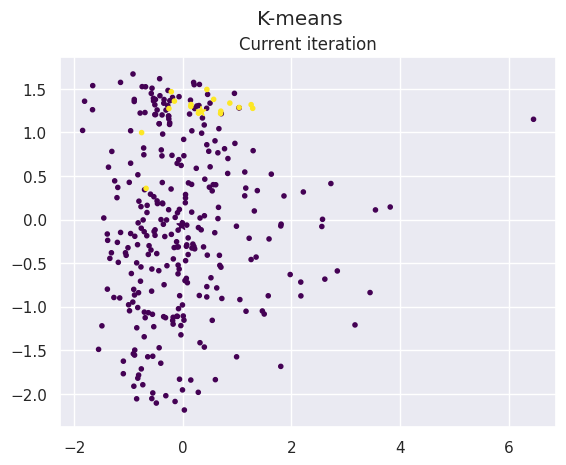

In [19]:
clusters = 2

scaler = StandardScaler()
# Scale the variables
scaled_data = scaler.fit_transform(HR_data[['HR_TD_Mean', 'TEMP_TD_Mean', 'EDA_TD_P_Mean']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=clusters, n_init=1, random_state=1, max_iter=1)
y_pred = kmeans.fit_predict(scaled_data)

fig, ax = plt.subplots(1,1)
plt.suptitle("K-means")

# Scatter plot for the initial iteration
ax.scatter(scaled_data[:,0], scaled_data[:,1], marker='.', c=y_pred, label = np.unique(y_pred))

# Iterate over subsequent iterations
current_iter = 0
total_iter = 10
for _ in range(total_iter):
    kmeans = KMeans(n_clusters=clusters, init="random", n_init=1, random_state=0, max_iter=1 + current_iter)
    y_pred = kmeans.fit_predict(scaled_data)

    plotting(scaled_data, kmeans, y_pred, ax)
    fig.canvas.draw()

    current_iter += 1
    print(f'Iteration nr: {current_iter}.', end='\r')
    time.sleep(1)

In [20]:
# Determine the indices of each cluster
indices_cluster_0 = np.where(y_pred == 0)[0]
indices_cluster_1 = np.where(y_pred == 1)[0]
#indices_cluster_2 = np.where(y_pred == 2)[0]

cluster_0 = HR_data.iloc[indices_cluster_0]
cluster_1 = HR_data.iloc[indices_cluster_1]
#cluster_2 = HR_data.iloc[indices_cluster_2]

In [21]:
import plotly.graph_objs as go
import plotly.io as pio

# Set notebook mode to work in Jupyter Notebook
pio.renderers.default = 'notebook_connected'

# Create traces for each cluster
trace0 = go.Scatter3d(
    x=cluster_0['HR_TD_Mean'],
    y=cluster_0['TEMP_TD_Mean'],
    z=cluster_0['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Cluster 0'
)

trace1 = go.Scatter3d(
    x=cluster_1['HR_TD_Mean'],
    y=cluster_1['TEMP_TD_Mean'],
    z=cluster_1['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='Cluster 1'
)

"""trace2 = go.Scatter3d(
    x=cluster_2['HR_TD_Mean'],
    y=cluster_2['TEMP_TD_Mean'],
    z=cluster_2['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Cluster 2'
)"""

"""trace3 = go.Scatter3d(
    x=cluster_3['HR_TD_Mean'],
    y=cluster_3['TEMP_TD_Mean'],
    z=cluster_3['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='orange'),
    name='Cluster 3'
)"""

# Create layout
layout = go.Layout(
    title='3D Scatter Plot of Clusters',
    scene=dict(
        xaxis=dict(title='HR_TD_Mean'),
        yaxis=dict(title='TEMP_TD_Mean'),
        zaxis=dict(title='EDA_TD_P_Mean')
    )
)

# Combine traces and layout
#fig = go.Figure(data=[trace0, trace1, trace2, trace3], layout=layout)
fig = go.Figure(data=[trace0, trace1], layout=layout)


# Show plot
fig.show()

We observe that defining a k-means clustering with 2 clusters basically splits the data based on the levels of `EDA_TD_P_Mean`: one cluster for each low or high levels of this variable.

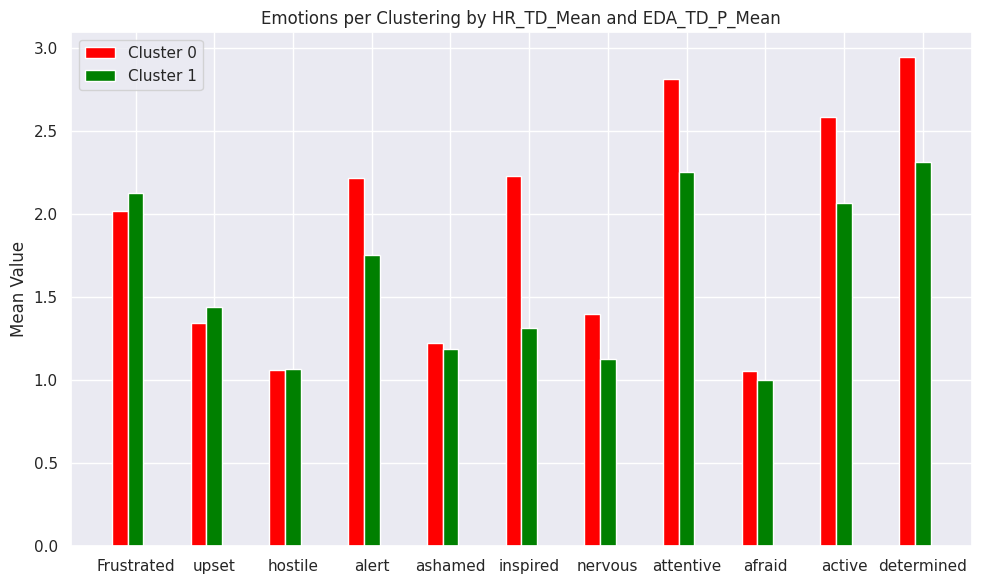

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Variables to plot
variables = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# DataFrames
#dataframes = [cluster_0, cluster_1, cluster_2]
dataframes = [cluster_0, cluster_1]


# Define colors for each cluster
#colors = ['red', 'green', 'blue']
colors = ['red', 'green']

# Prepare data for plotting
means = {var: [np.mean(df[var]) for df in dataframes] for var in variables}

# Create bar plot
plt.figure(figsize=(10, 6))

# Width of each group of bars
bar_width = 0.2  

# Index for the x-axis ticks
index = np.arange(len(variables))  

# Empty list to store handles for legend
legend_handles = []

for i, var in enumerate(variables):
    # Calculate the x positions for the bars of each cluster
    x_positions = (index + i)/2
    bar_0 = plt.bar(x_positions[i], means[var][0], bar_width, label=f'{var} (Cluster {0})', color=colors[0])
    bar_1 = plt.bar(x_positions[i]+bar_width, means[var][1], bar_width, label=f'{var} (Cluster {1})', color=colors[1])
    #bar_2 = plt.bar(x_positions[i]+2*bar_width, means[var][2], bar_width, label=f'{var} (Cluster {2})', color=colors[2])
    
    # Add handles for the bars to the legend_handles list
    #legend_handles.extend([bar_0[0], bar_1[0], bar_2[0]])
    legend_handles.extend([bar_0[0], bar_1[0]])

    
# Set labels and title
plt.ylabel('Mean Value')
plt.title('Emotions per Clustering by HR_TD_Mean and EDA_TD_P_Mean')
plt.xticks(index + bar_width, variables)
#plt.legend(handles=legend_handles, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.legend(handles=legend_handles, labels=['Cluster 0', 'Cluster 1'])
plt.tight_layout()
plt.show()


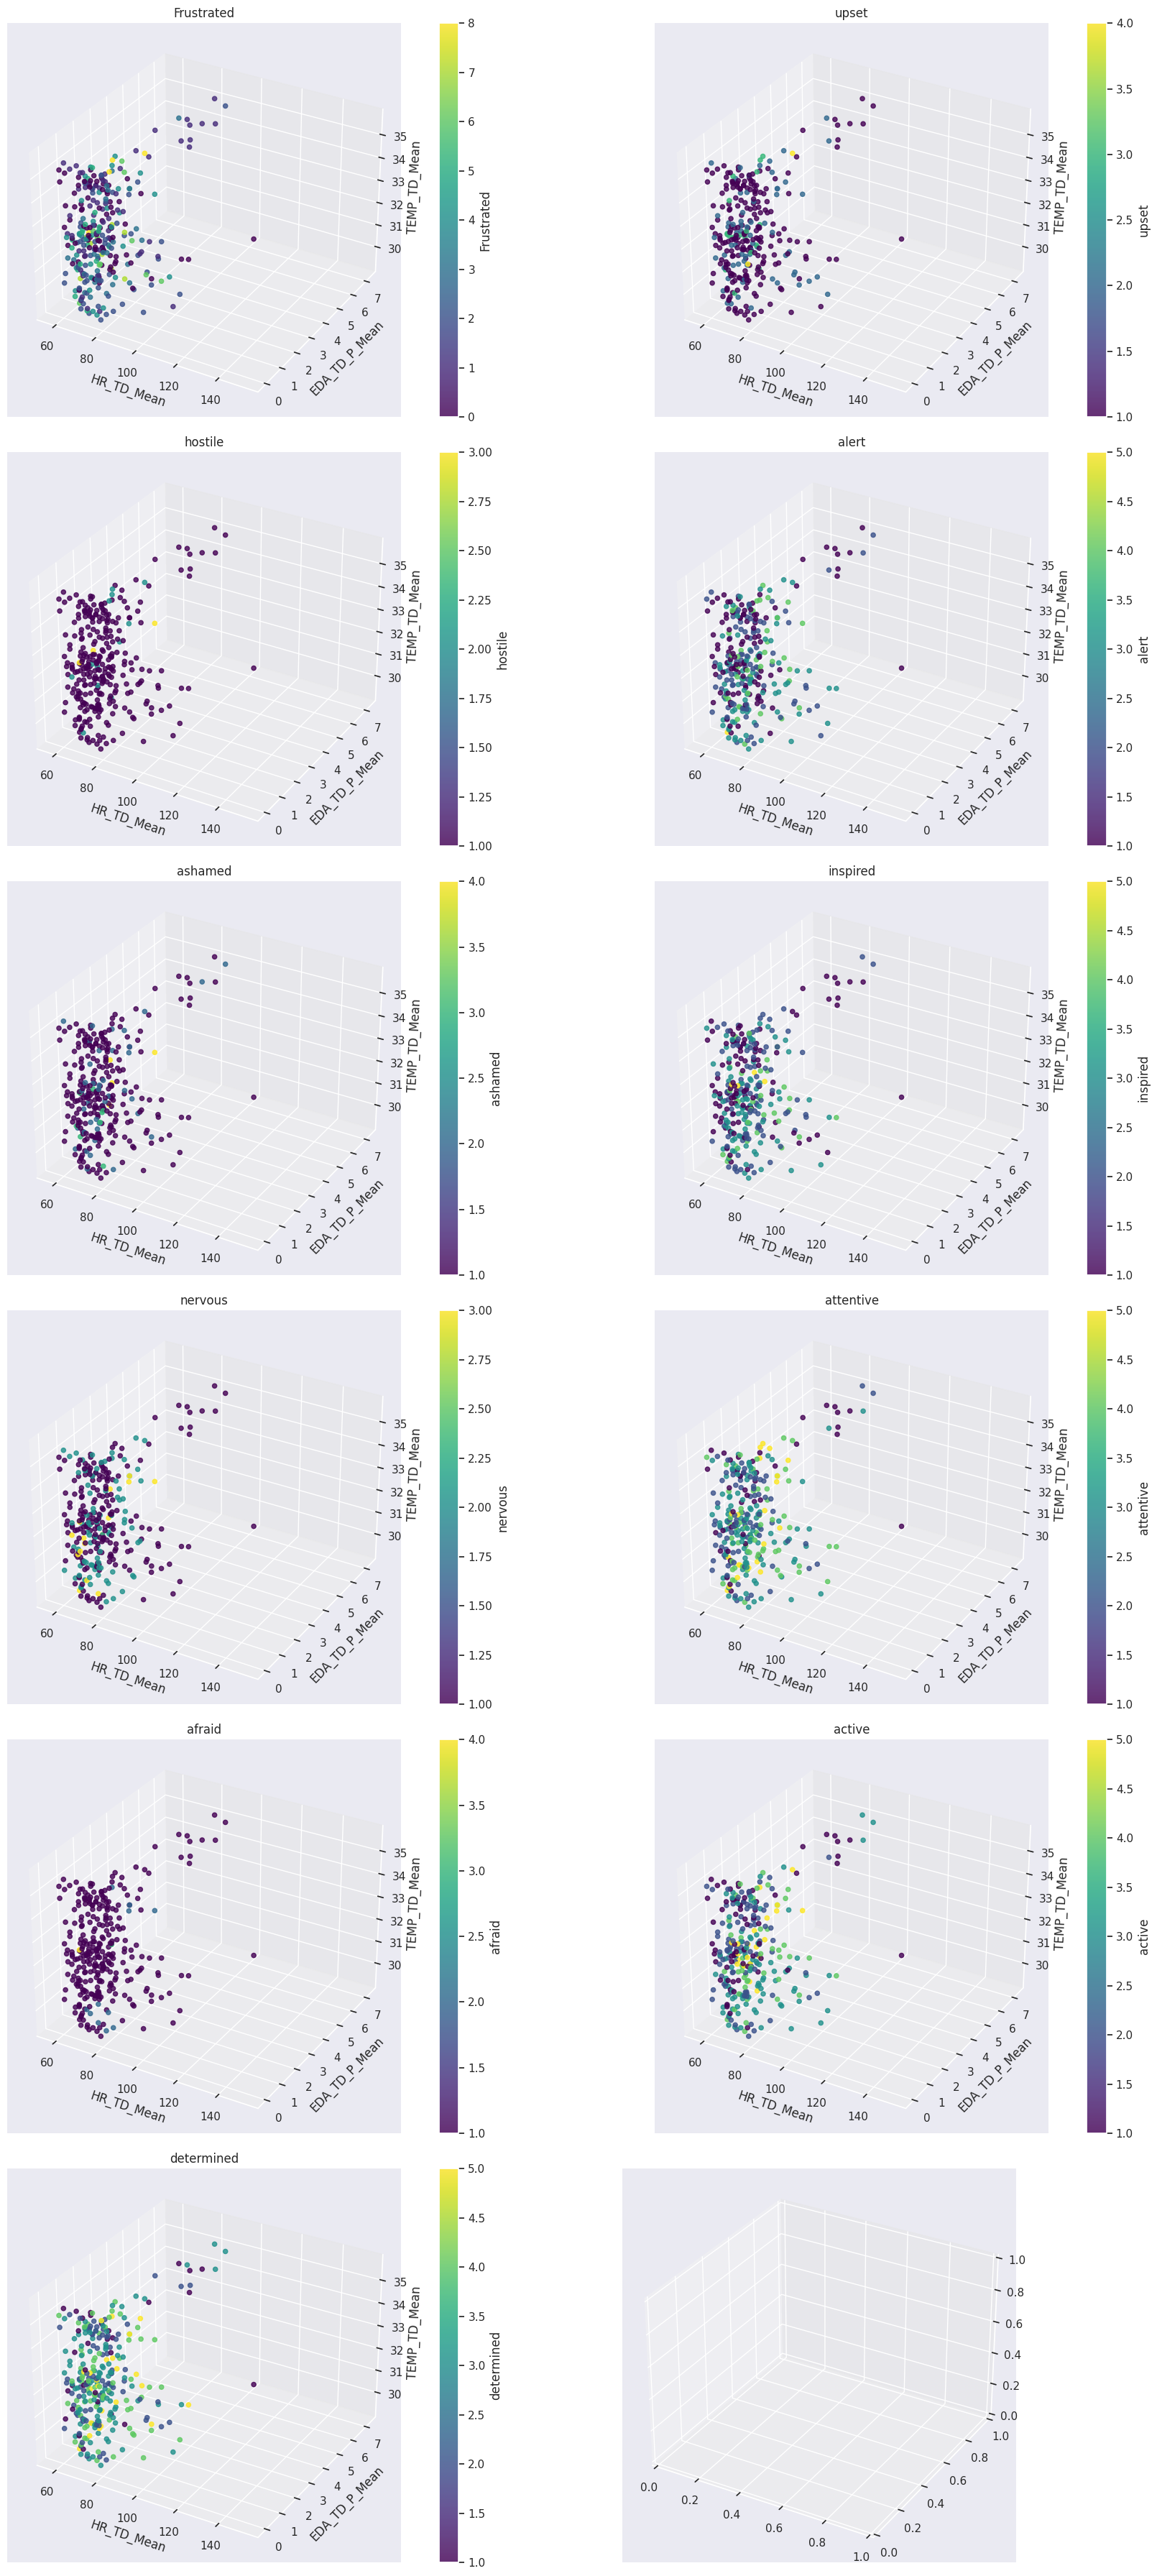

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Variables to plot
variables = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Create subplots grid
fig, axs = plt.subplots(6, 2, figsize=(20, 36), subplot_kw={'projection': '3d'})

# Flatten axs to make iteration easier
axs = axs.flatten()

# Iterate over variables and create scatter plots
for i, var in enumerate(variables):
    x = HR_data['HR_TD_Mean']
    y = HR_data['EDA_TD_P_Mean']
    z = HR_data['TEMP_TD_Mean']
    variable = HR_data[var]

    # Scatter plot
    scatter = axs[i].scatter(x, y, z, c=variable, cmap='viridis', alpha=0.8)

    # Colorbar
    fig.colorbar(scatter, ax=axs[i], label=var)

    # Labels and title
    axs[i].set_xlabel('HR_TD_Mean', labelpad=5)
    axs[i].set_ylabel('EDA_TD_P_Mean', labelpad=5)
    axs[i].set_zlabel('TEMP_TD_Mean', labelpad=1)
    axs[i].set_title(f'{var}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


### Now the same study but with Hierarchical Clustering

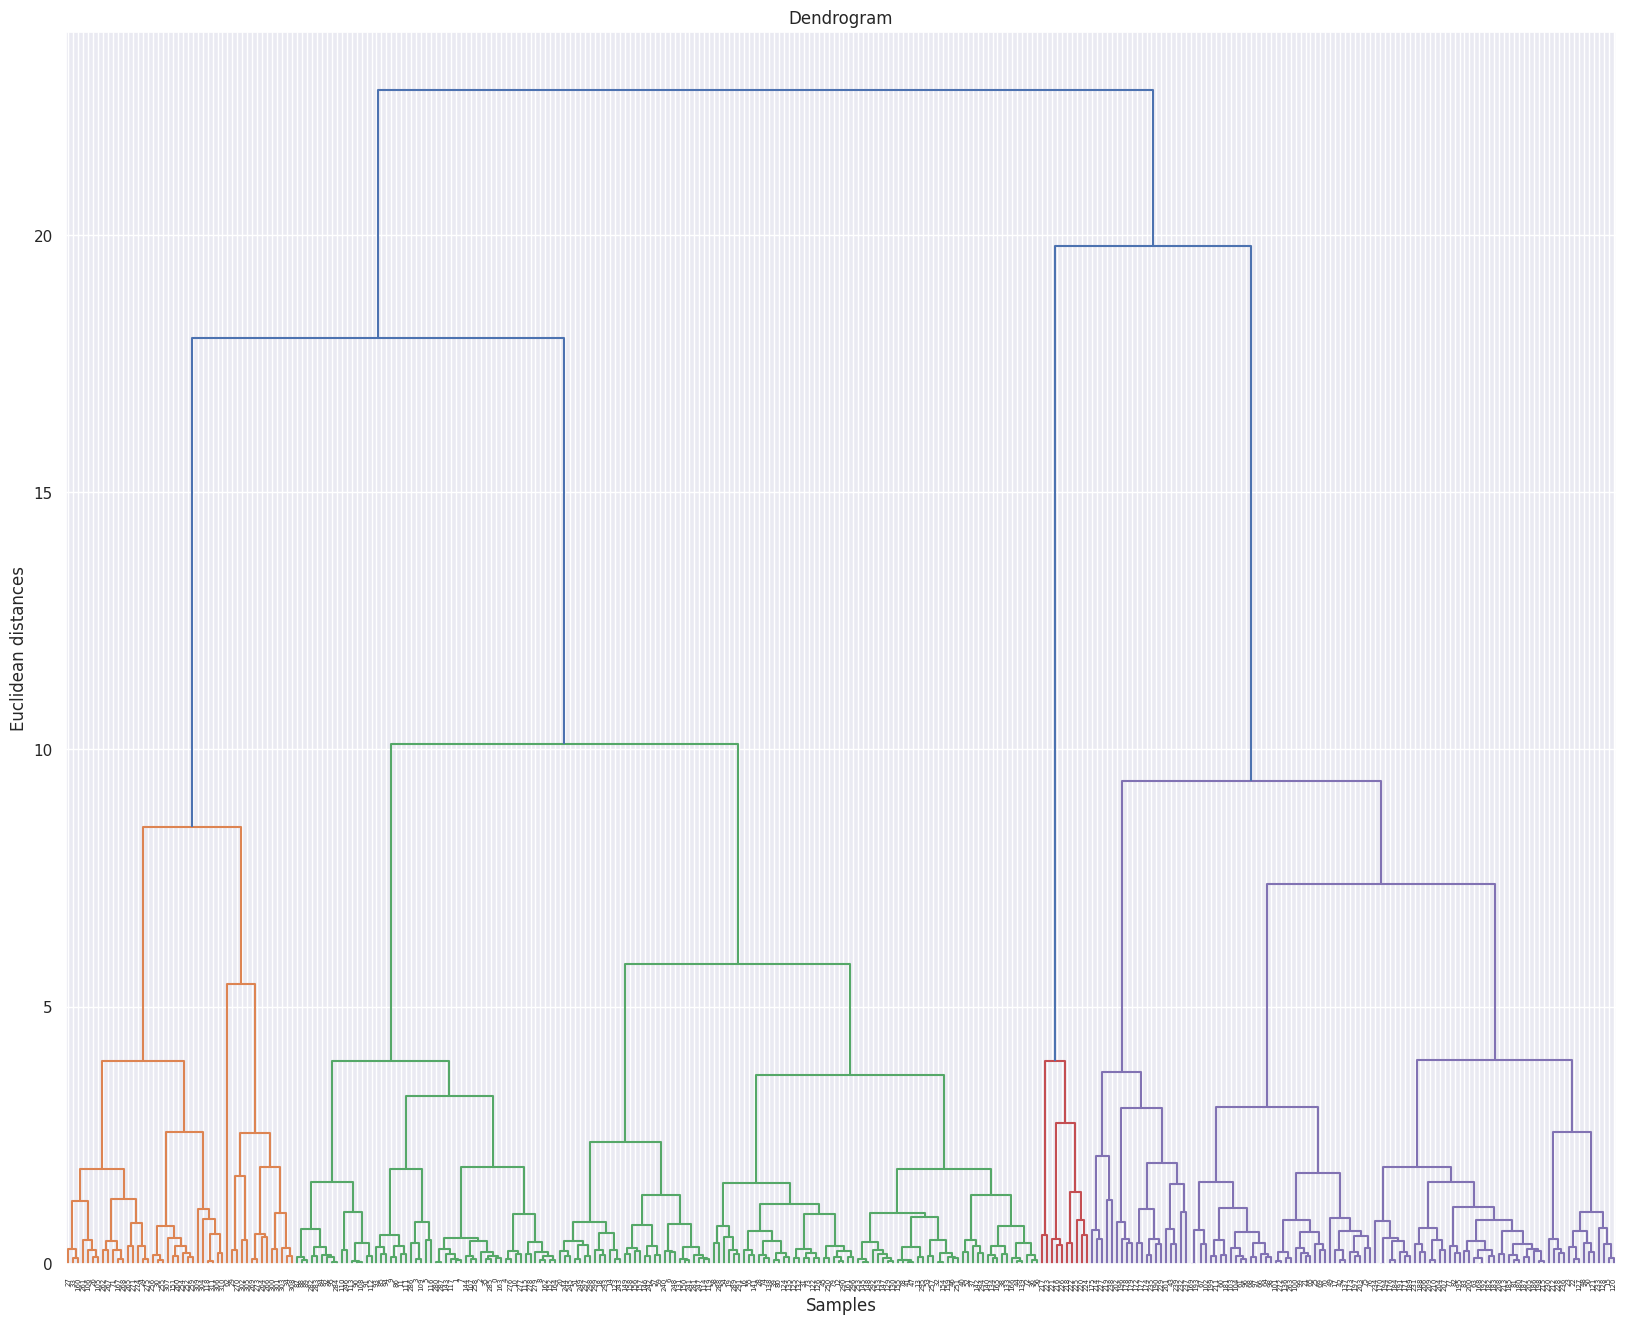

In [24]:
#Import the AgglomerativeClustering and silhouette_score modules from the scikit-learn library
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

#Create a figure with size 20x16
plt.figure(1, figsize = (20 ,16))

selected_HR_data = HR_data[['HR_TD_Mean', 'TEMP_TD_Mean', 'EDA_TD_P_Mean']]
scaler = StandardScaler()
        # Scale the variables
scaled_data = scaler.fit_transform(selected_HR_data)

#Create a dendrogram using the linkage method with the X_unsupervised data
Dendrogram = shc.dendrogram((shc.linkage(scaled_data, method ='ward')))

#Label the graph
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')

#Show the plot
plt.show()

Looking at the dendogram, it would be reasonable to split the data in 2 or even 4 clusters. We decide to split in 2 as it is the same number of clusters that we defined in k-means, for consistency purposes.

Now we fit the Hierarchical clustering with 2 clusters to the data and calculate the Silhouette score, which retrieves a value of 0.33, suggesting that the clustering result is reasonable, indicating that the clusters are distinct and well-separated, but there is still room for improvement.

In [25]:
hierarchical_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(scaled_data)

labels = hierarchical_model.labels_
clusters = hierarchical_model.fit_predict(scaled_data)

# Max score: 1.  Min score: -1 (wrong assignations). Scores near 0 indicate overlapping clusters
score = silhouette_score(scaled_data, hierarchical_model.labels_, metric='euclidean')
print(score)

0.3339019657310999


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [26]:
# Determine the indices of each cluster
indices_cluster_0 = np.where(clusters == 0)[0]
indices_cluster_1 = np.where(clusters == 1)[0]
#indices_cluster_2 = np.where(clusters == 2)[0]
#indices_cluster_3 = np.where(clusters == 3)[0]

cluster_0 = HR_data.iloc[indices_cluster_0]
cluster_1 = HR_data.iloc[indices_cluster_1]
#cluster_2 = HR_data.iloc[indices_cluster_2]
#cluster_3 = HR_data.iloc[indices_cluster_3]

In [27]:
import plotly.graph_objs as go
import plotly.io as pio

# Set notebook mode to work in Jupyter Notebook
pio.renderers.default = 'notebook_connected'

# Create traces for each cluster
trace0 = go.Scatter3d(
    x=cluster_0['HR_TD_Mean'],
    y=cluster_0['TEMP_TD_Mean'],
    z=cluster_0['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Cluster 0'
)

trace1 = go.Scatter3d(
    x=cluster_1['HR_TD_Mean'],
    y=cluster_1['TEMP_TD_Mean'],
    z=cluster_1['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='Cluster 1'
)

"""trace2 = go.Scatter3d(
    x=cluster_2['HR_TD_Mean'],
    y=cluster_2['TEMP_TD_Mean'],
    z=cluster_2['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Cluster 2'
)

trace3 = go.Scatter3d(
    x=cluster_3['HR_TD_Mean'],
    y=cluster_3['TEMP_TD_Mean'],
    z=cluster_3['EDA_TD_P_Mean'],
    mode='markers',
    marker=dict(size=5, color='orange'),
    name='Cluster 3'
)"""

# Create layout
layout = go.Layout(
    title='3D Scatter Plot of Clusters',
    scene=dict(
        xaxis=dict(title='HR_TD_Mean'),
        yaxis=dict(title='TEMP_TD_Mean'),
        zaxis=dict(title='EDA_TD_P_Mean')
    )
)

# Combine traces and layout
#fig = go.Figure(data=[trace0, trace1, trace2, trace3], layout=layout)
fig = go.Figure(data=[trace0, trace1], layout=layout)


# Show plot
fig.show()

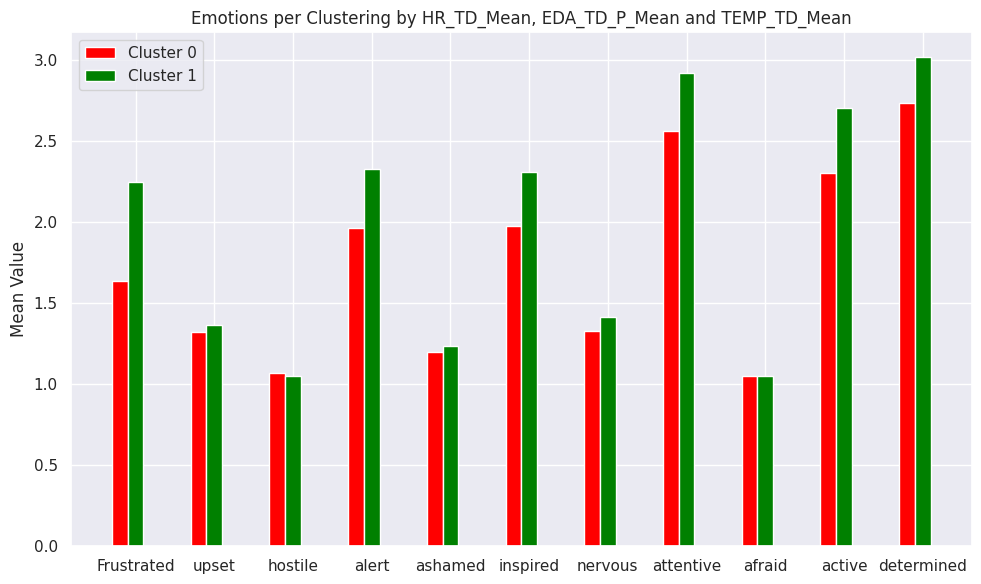

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Variables to plot
variables = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# DataFrames
#dataframes = [cluster_0, cluster_1, cluster_2, cluster_3]
dataframes = [cluster_0, cluster_1]


# Define colors for each cluster
#colors = ['red', 'green', 'blue', 'orange']
colors = ['red', 'green']


# Prepare data for plotting
means = {var: [np.mean(df[var]) for df in dataframes] for var in variables}

# Create bar plot
plt.figure(figsize=(10, 6))

# Width of each group of bars
bar_width = 0.2  

# Index for the x-axis ticks
index = np.arange(len(variables))  

# Empty list to store handles for legend
legend_handles = []

for i, var in enumerate(variables):
    # Calculate the x positions for the bars of each cluster
    x_positions = (index + i)/2
    bar_0 = plt.bar(x_positions[i], means[var][0], bar_width, label=f'{var} (Cluster {0})', color=colors[0])
    bar_1 = plt.bar(x_positions[i]+bar_width, means[var][1], bar_width, label=f'{var} (Cluster {1})', color=colors[1])
    #bar_2 = plt.bar(x_positions[i]+2*bar_width, means[var][2], bar_width, label=f'{var} (Cluster {2})', color=colors[2])
    #bar_3 = plt.bar(x_positions[i]+3*bar_width, means[var][3], bar_width, label=f'{var} (Cluster {3})', color=colors[3])
    
    # Add handles for the bars to the legend_handles list
    #legend_handles.extend([bar_0[0], bar_1[0], bar_2[0], bar_3[0]])
    legend_handles.extend([bar_0[0], bar_1[0]])

# Set labels and title
plt.ylabel('Mean Value')
plt.title('Emotions per Clustering by HR_TD_Mean, EDA_TD_P_Mean and TEMP_TD_Mean')
plt.xticks(index + bar_width, variables)
#plt.legend(handles=legend_handles, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster_3'])
plt.legend(handles=legend_handles, labels=['Cluster 0', 'Cluster 1'])
plt.tight_layout()
plt.show()


Jesús 

**Comparing variables from the signals across phases 1 and 2 (right and inmediatly after stress) to find potential patterns that difference between the phases and demonstrate these variables can be used as markers of stress**

In [29]:
# filter only the observations from the first and second phases
phase1_2_data = HR_data[HR_data['Phase'].isin(['phase1', 'phase2'])]


Using physiological variables extracted from the signals, we aim to perform clustering and then compare number of observations that belong to each phase for each cluster. Ideally, we would expect two clusters, one for the phase 1 and the other for the phase 2, so that is our groundtruth, and K is selected to be equal to 2. 

This study is repeated for the data of each round indepenently, and for the data of all rounds collectively to see if there are any other patterns that suggest stress adaptation. For instance, we would expect to bigger differences before and after the stress in the first round since it is the first time subjects are exposed to the puzzle. 

Stress triggers sympathetic nervous system, we expect to simultaneously have more Heart Rate Variability, higher conductivity due to sweating glands activiation affecting the EDA... Then, variables to be studied were chosen based on this idea. 

**STD of HR and Max value of EDA**

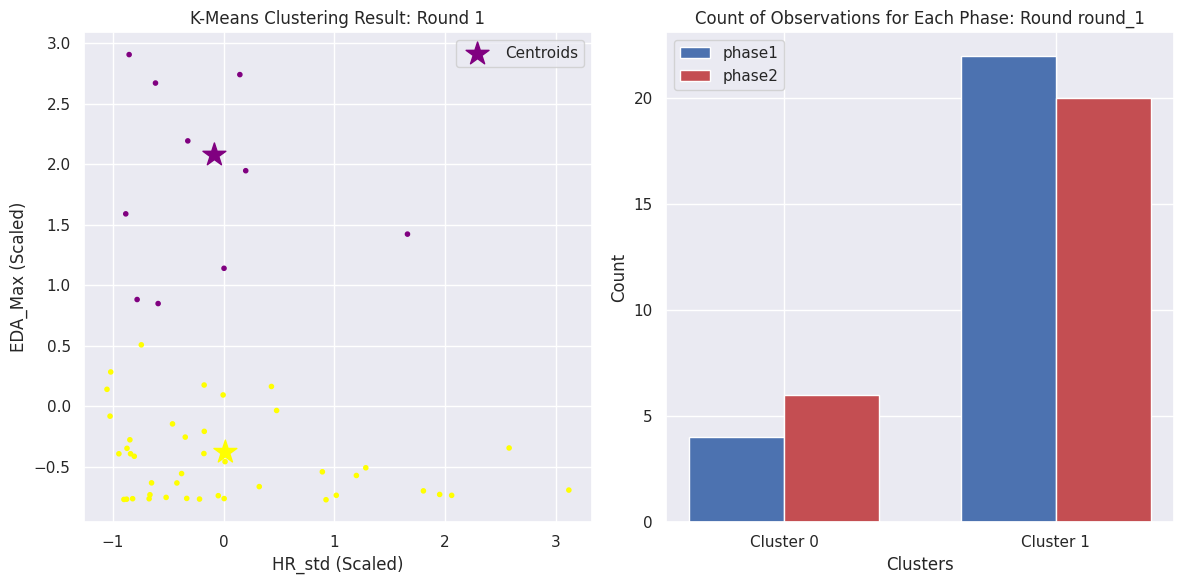

For n_clusters = 2 the average silhouette_score is:
--- 0.4887600637624701 ---


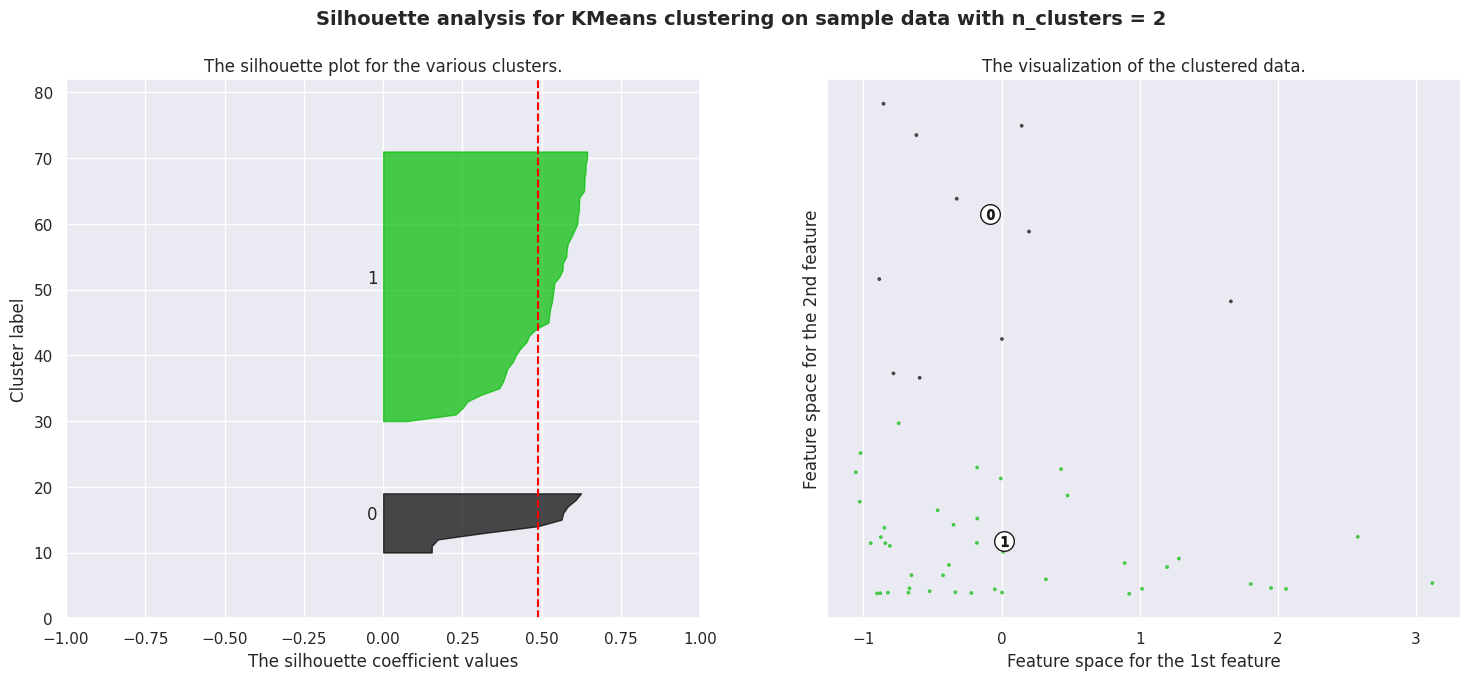

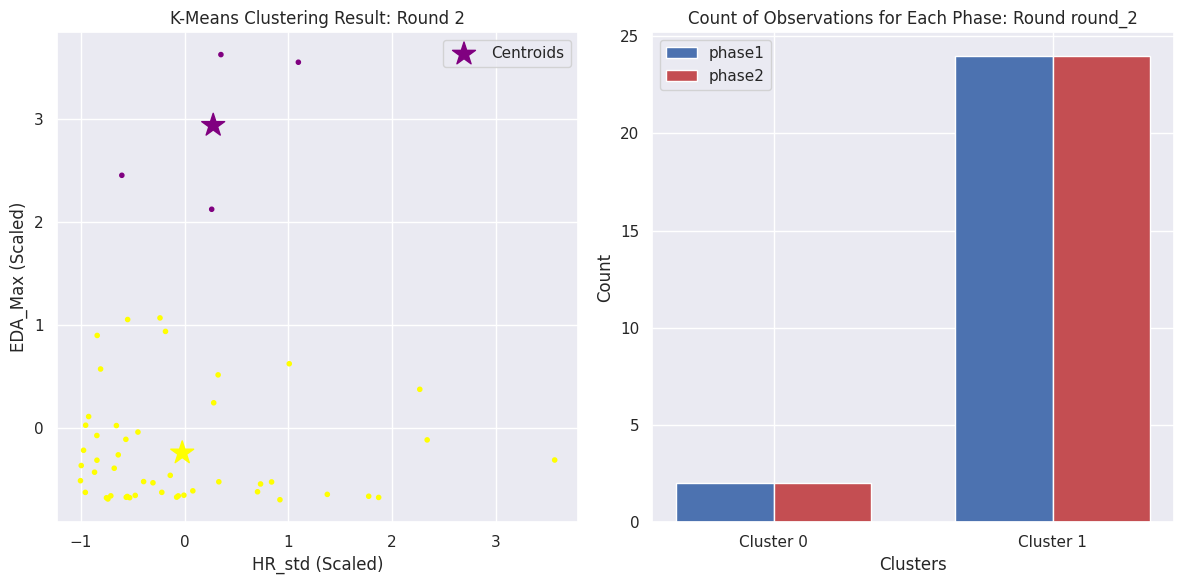

For n_clusters = 2 the average silhouette_score is:
--- 0.5917640892103502 ---


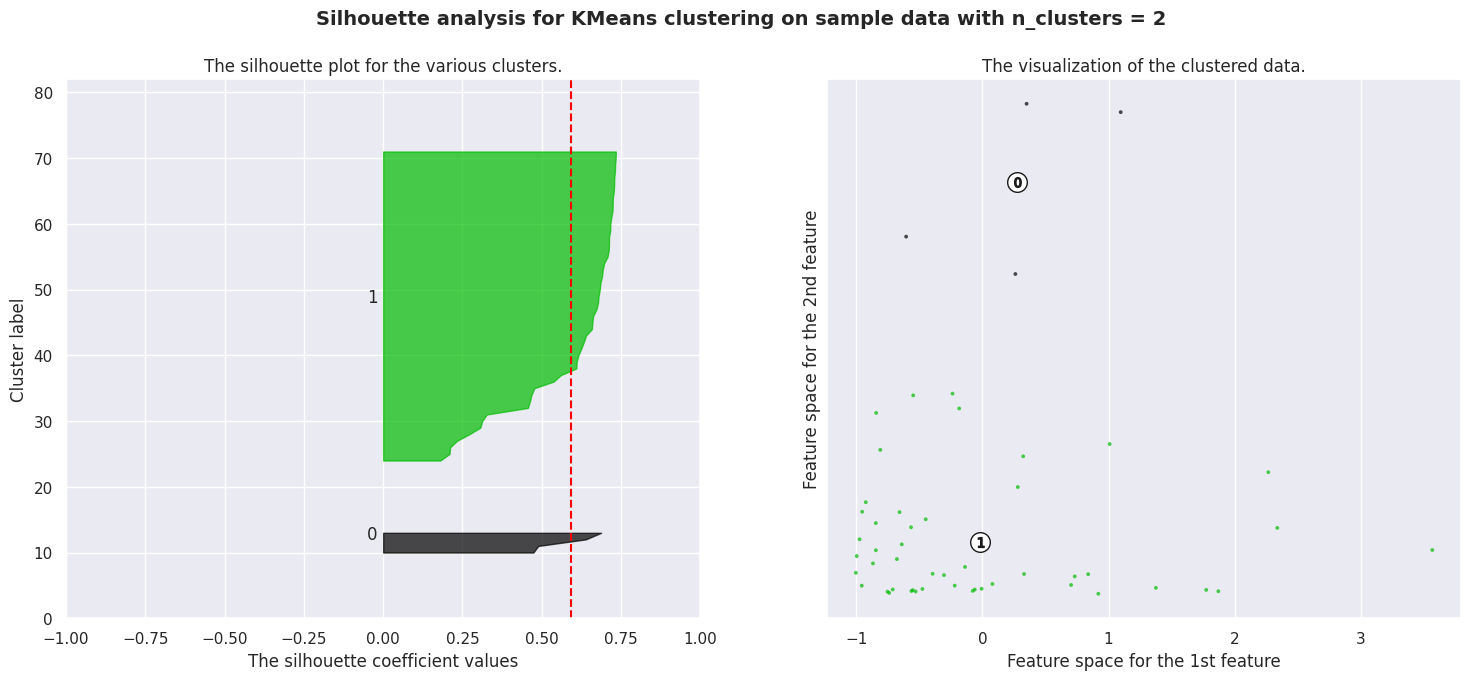

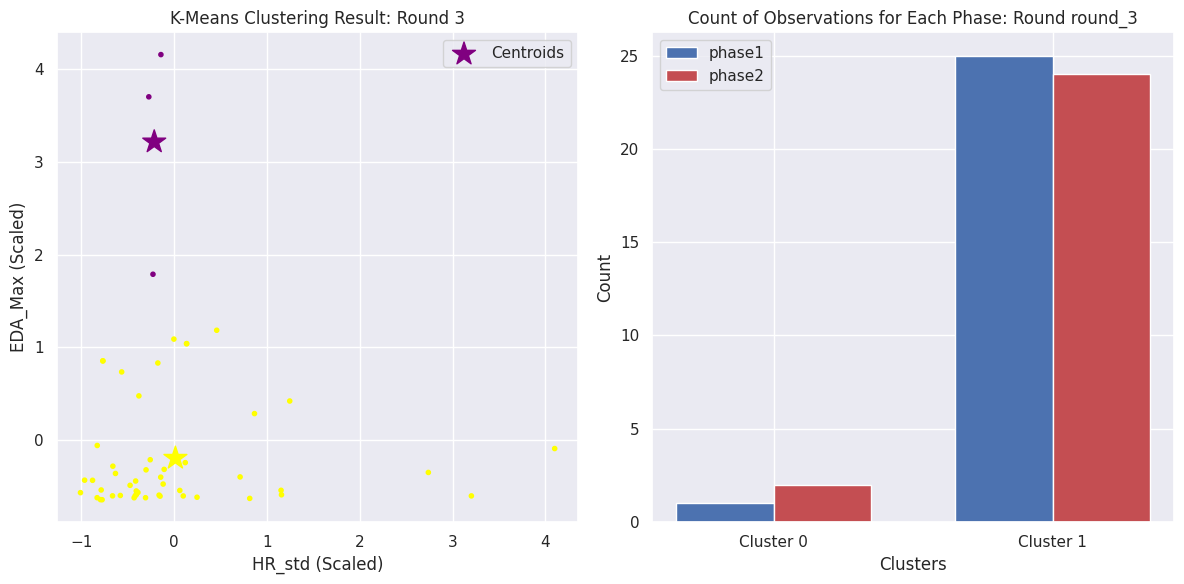

For n_clusters = 2 the average silhouette_score is:
--- 0.6107435028167546 ---


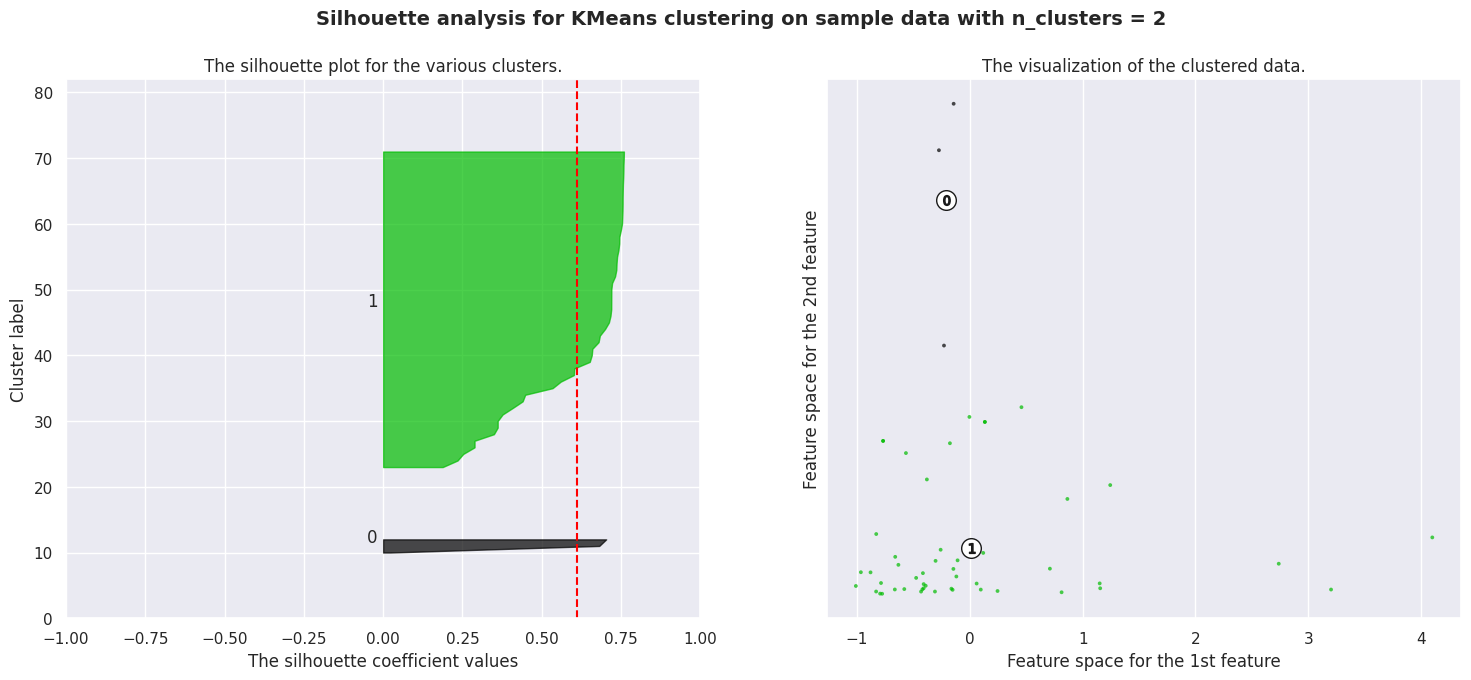

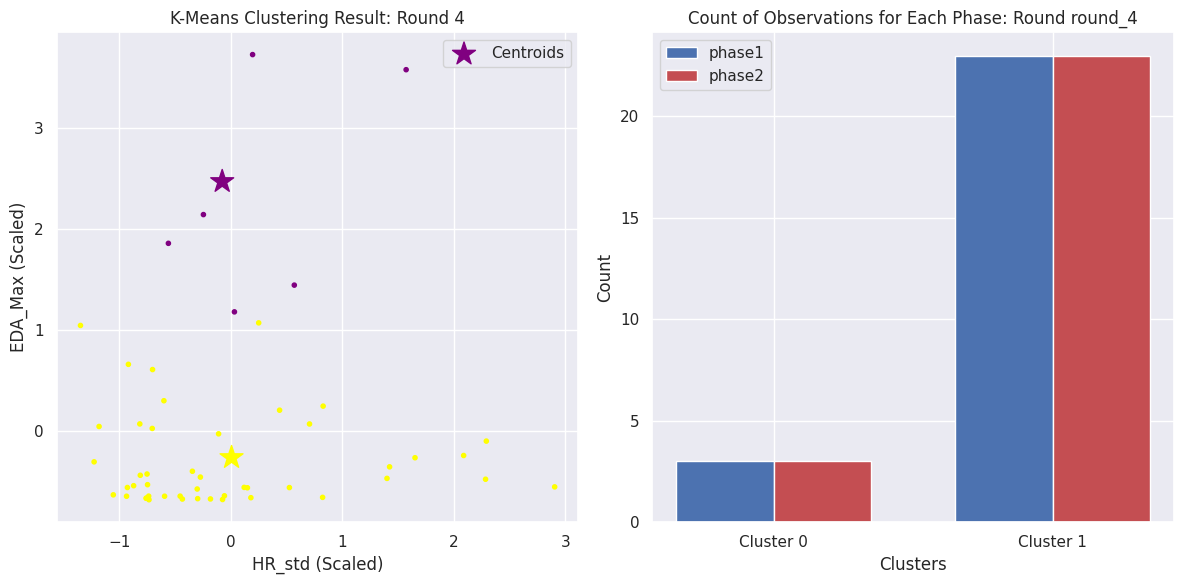

For n_clusters = 2 the average silhouette_score is:
--- 0.5135324254290068 ---


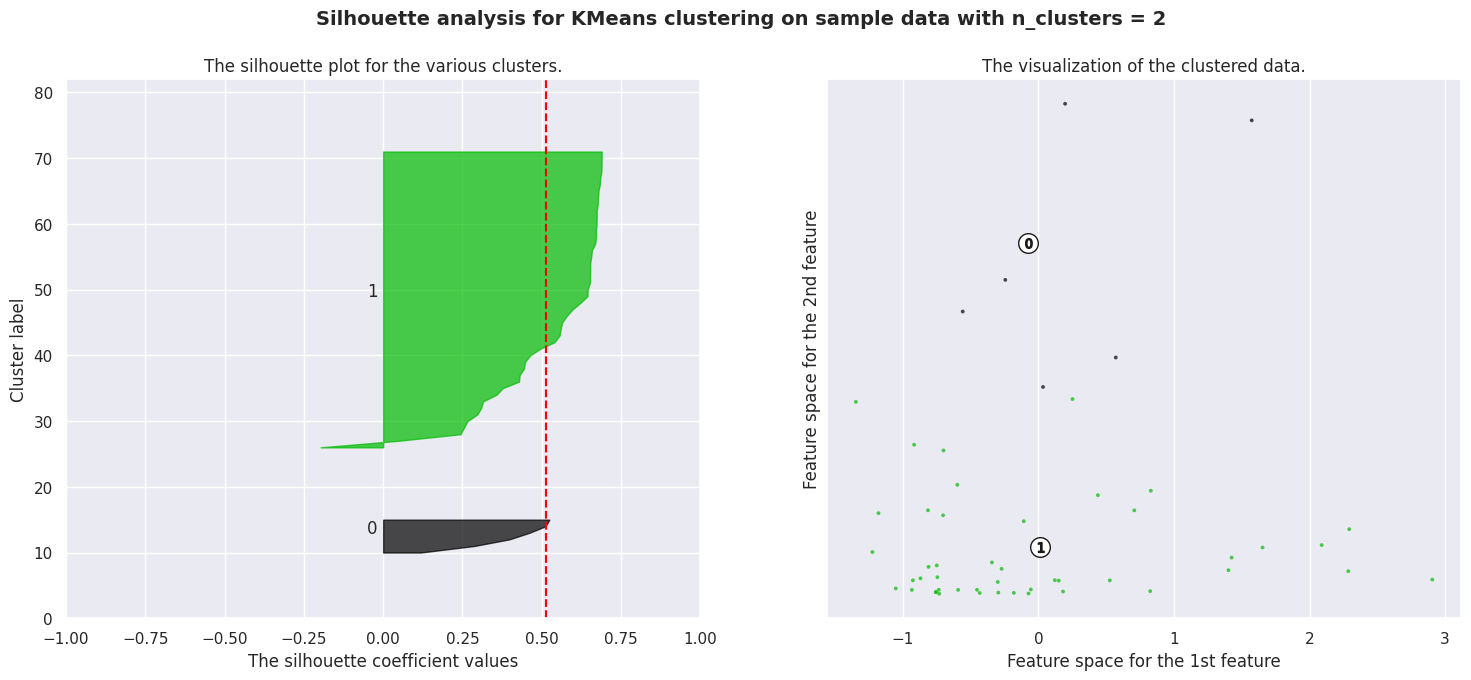

In [30]:
## Compare STD of HR and Max value of EDA (Per Round) ##

# Define color map
color_map = {'phase1': 'b', 'phase2': 'r'}

# Filter rounds to include only round 1 and round 4
filtered_rounds = ['round_1', 'round_2', 'round_3', 'round_4']

# Instantiate StandardScaler
scaler = StandardScaler()

# Iterate over each round
for current_round in filtered_rounds:
    round_data = phase1_2_data[phase1_2_data['Round'] == current_round]
    
    # Scale the data for the current round
    scaled_data = scaler.fit_transform(round_data[['HR_TD_std', 'EDA_TD_P_Max']])
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=2, n_init=1, random_state=1, max_iter=1)
    y_pred = kmeans.fit_predict(scaled_data)
    
    # Create figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot clustering results
    axs[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=['purple' if label == 0 else 'yellow' for label in y_pred], marker='.')
    axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=['purple','yellow'], marker='*', label='Centroids')
    axs[0].set_xlabel('HR_std (Scaled)')
    axs[0].set_ylabel('EDA_Max (Scaled)')
    axs[0].set_title(f"K-Means Clustering Result: Round {current_round[-1]}")
    axs[0].legend()
    
    # Plot count of observations for each phase within each cluster
    cluster_counts = {i: {'phase1': 0, 'phase2': 0} for i in range(len(np.unique(y_pred)))}
    
    for phase, color in color_map.items():
        phase_data = round_data[round_data['Phase'] == phase]
        for cluster in np.unique(y_pred):
            cluster_counts[cluster][phase] = np.sum(y_pred[round_data['Phase'] == phase] == cluster)
    
    cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
    phase_labels = list(color_map.keys())
    cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]
    
    bar_width = 0.35
    bar_positions = np.arange(len(cluster_labels))
    
    for i, phase in enumerate(phase_labels):
        axs[1].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)
    
    axs[1].set_xlabel('Clusters')
    axs[1].set_ylabel('Count')
    axs[1].set_title(f"Count of Observations for Each Phase: Round {current_round}")
    axs[1].set_xticks(bar_positions)
    axs[1].set_xticklabels(cluster_labels)
    axs[1].legend()
    
    plt.savefig(f"clustering_results_round_.png")

    # Show plot
    plt.tight_layout()

    plt.show()
    
    plot_silhouette(scaled_data, y_pred)

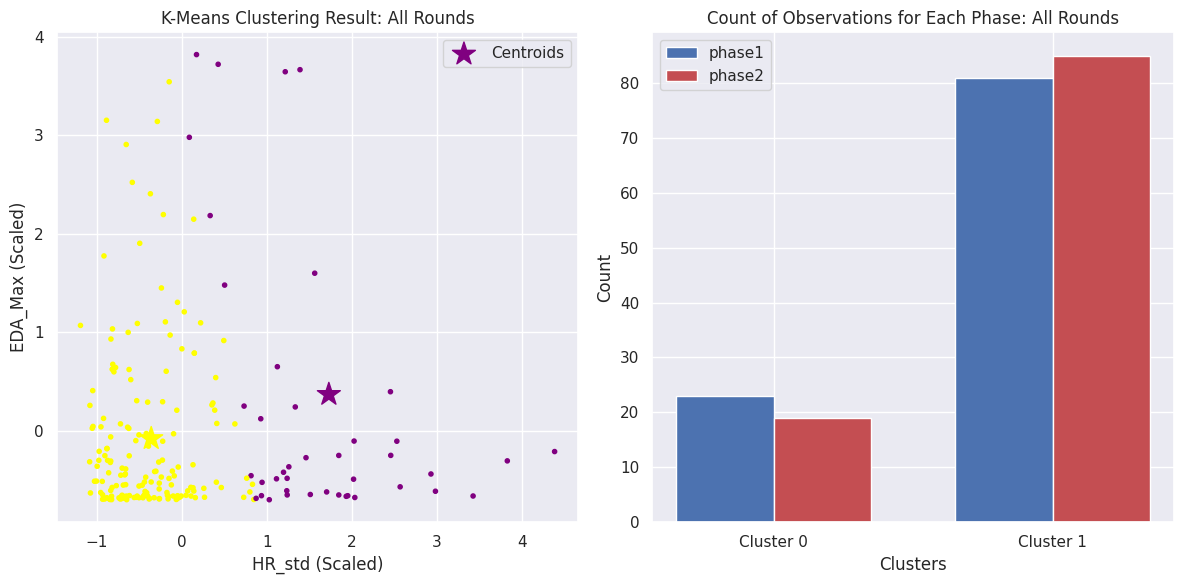

For n_clusters = 2 the average silhouette_score is:
--- 0.5000034291861163 ---


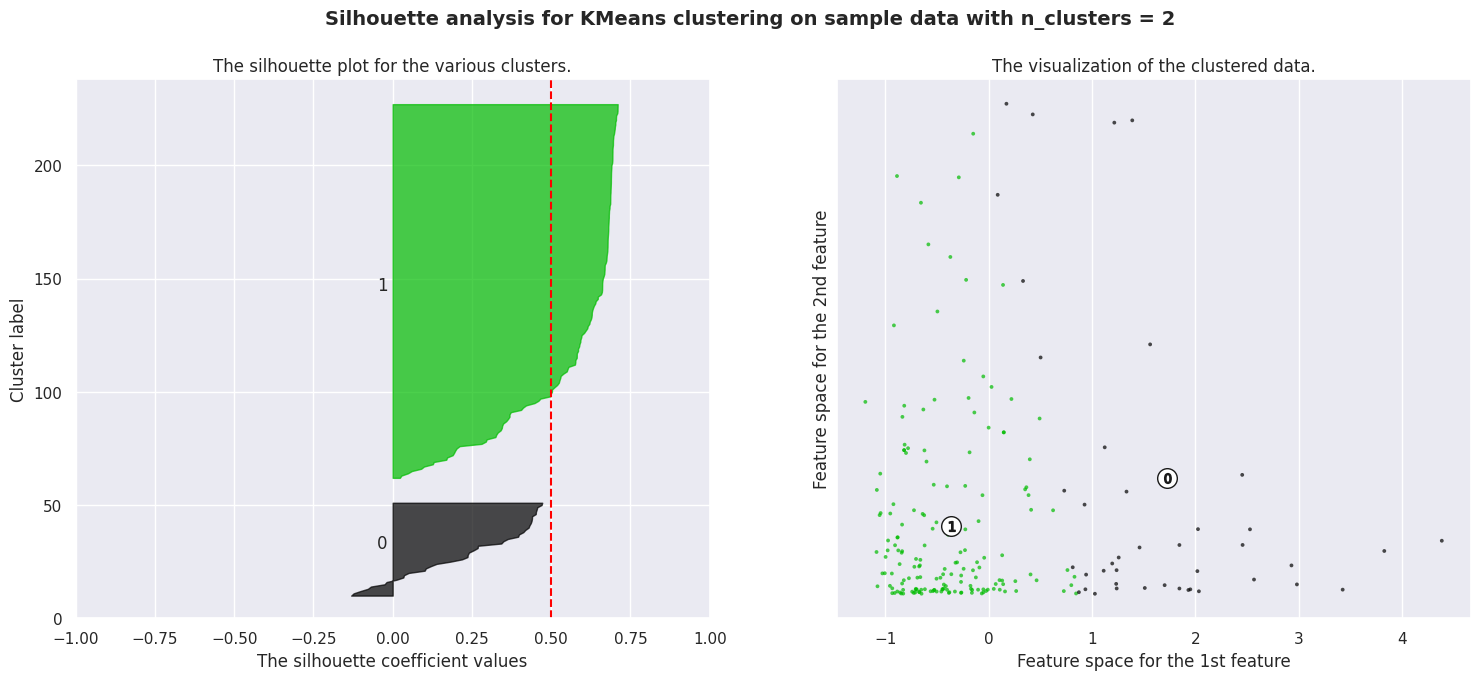

In [31]:
## Compare STD of HR and Max value of EDA (All rounds together) ##

# Concatenate data from all rounds
all_data = phase1_2_data[['HR_TD_std', 'EDA_TD_P_Max']]
all_labels = phase1_2_data['Phase']

# Instantiate StandardScaler
scaler = StandardScaler()

# Scale the combined data
scaled_data = scaler.fit_transform(all_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=1, random_state=1, max_iter=1)
y_pred = kmeans.fit_predict(scaled_data)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot clustering results
axs[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=['purple' if label == 0 else 'yellow' for label in y_pred], marker='.')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=['purple','yellow'], marker='*', label='Centroids')
axs[0].set_xlabel('HR_std (Scaled)')
axs[0].set_ylabel('EDA_Max (Scaled)')
axs[0].set_title("K-Means Clustering Result: All Rounds")
axs[0].legend()

# Plot count of observations for each phase within each cluster
cluster_counts = {i: {'phase1': 0, 'phase2': 0} for i in range(len(np.unique(y_pred)))}

for phase, color in color_map.items():
    for cluster in np.unique(y_pred):
        cluster_counts[cluster][phase] = np.sum((y_pred == cluster) & (all_labels == phase))

cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
phase_labels = list(color_map.keys())
cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]

bar_width = 0.35
bar_positions = np.arange(len(cluster_labels))

for i, phase in enumerate(phase_labels):
    axs[1].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)

axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Count')
axs[1].set_title("Count of Observations for Each Phase: All Rounds")
axs[1].set_xticks(bar_positions)
axs[1].set_xticklabels(cluster_labels)
axs[1].legend()

plt.tight_layout()

# Save plot
plt.savefig("clustering_results_all_rounds.png")

# Show plot
plt.show()

plot_silhouette(scaled_data, y_pred)

**Max of HR and Max value of EDA**

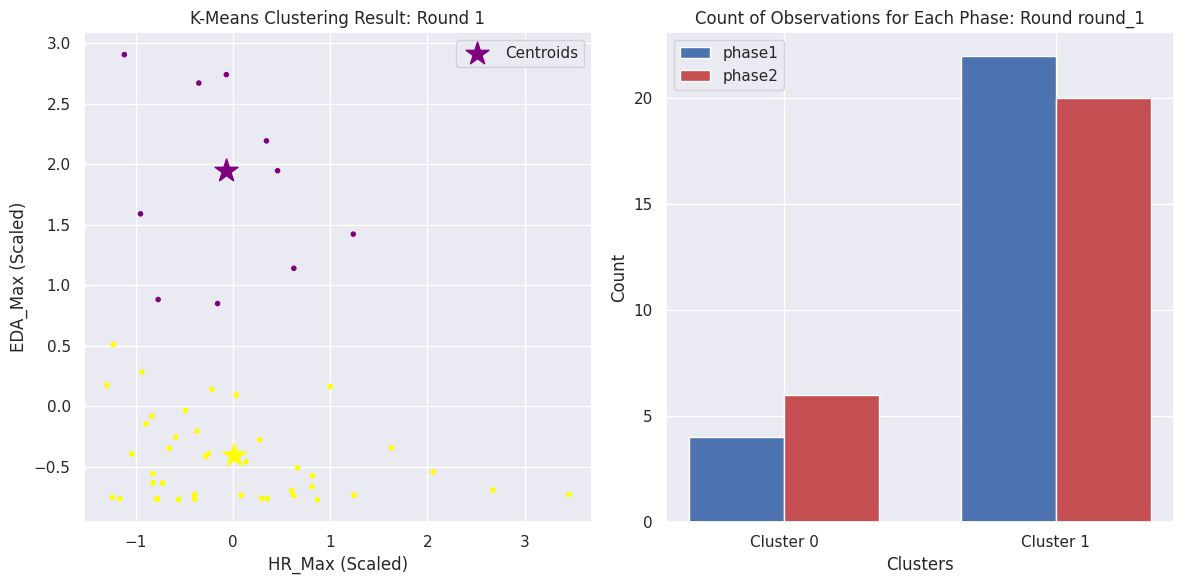

For n_clusters = 2 the average silhouette_score is:
--- 0.4856191436519224 ---


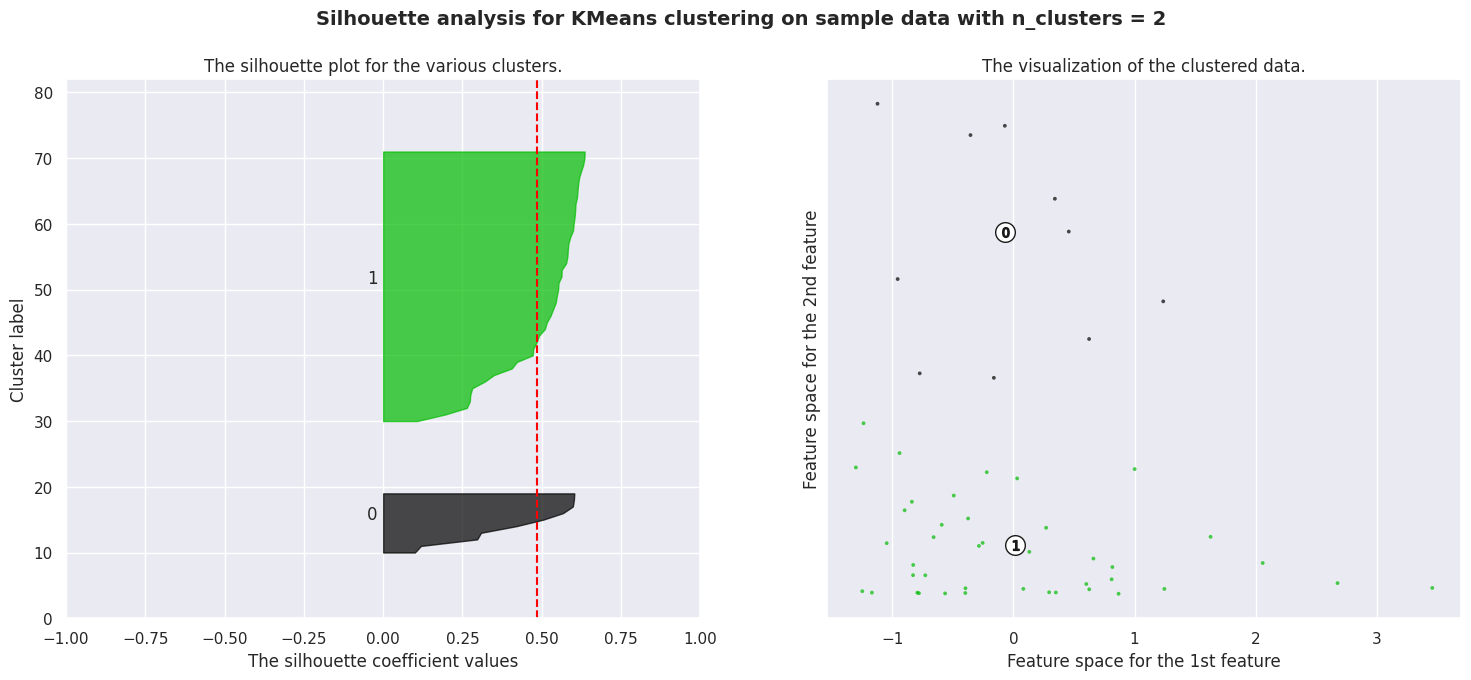

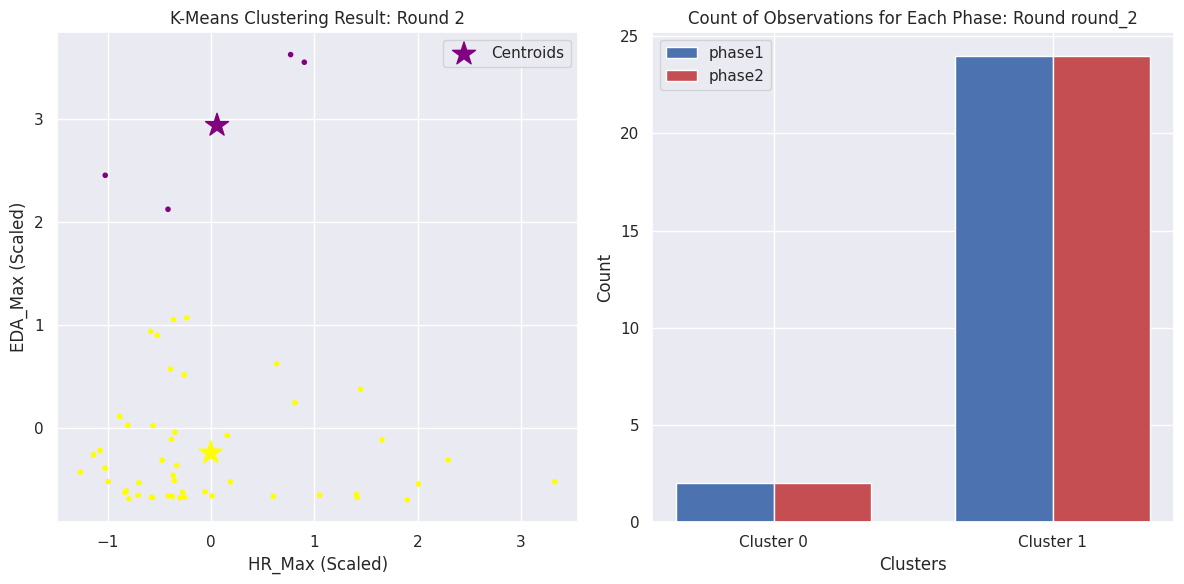

For n_clusters = 2 the average silhouette_score is:
--- 0.5897738554260907 ---


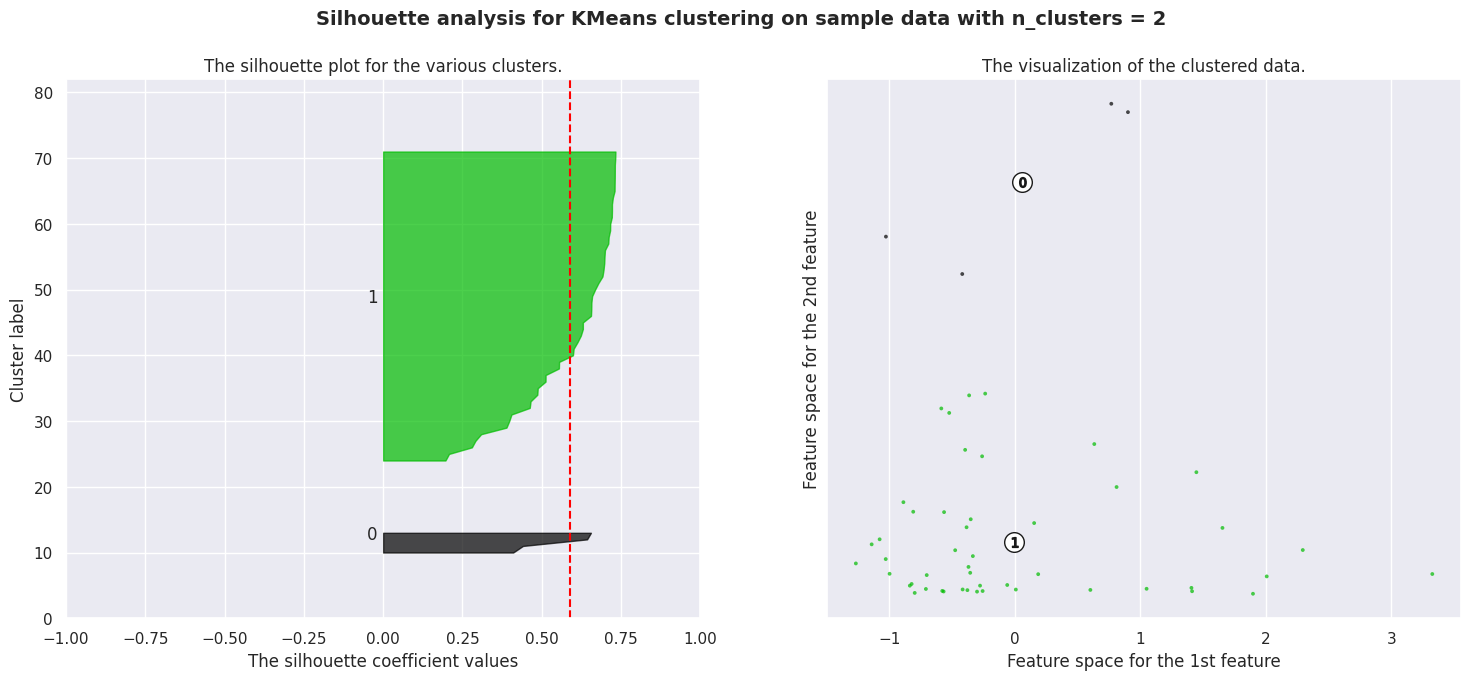

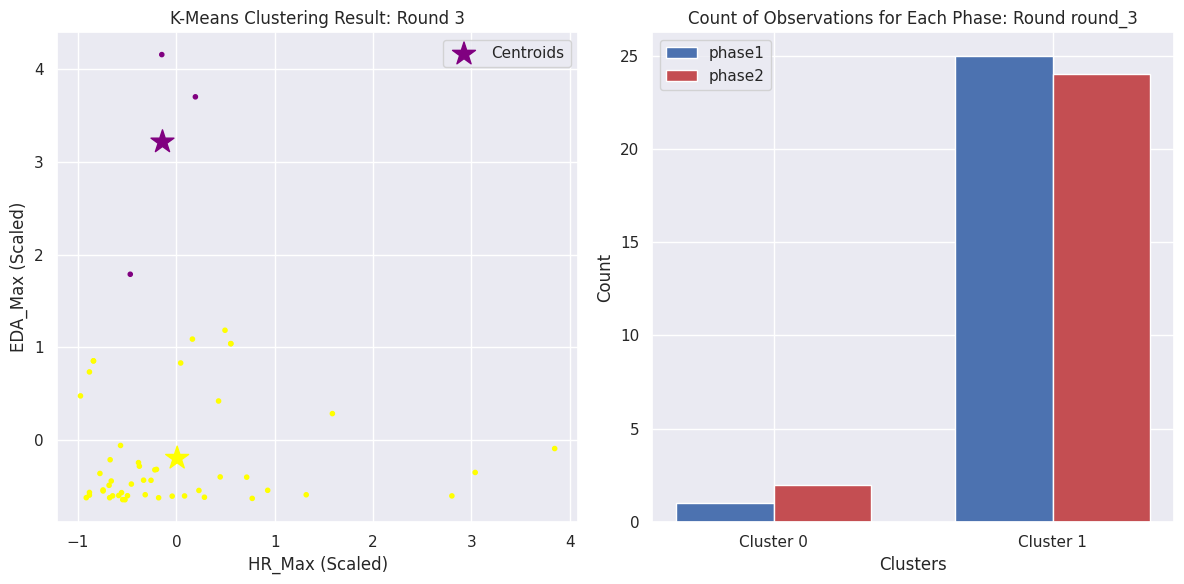

For n_clusters = 2 the average silhouette_score is:
--- 0.6076788066356112 ---


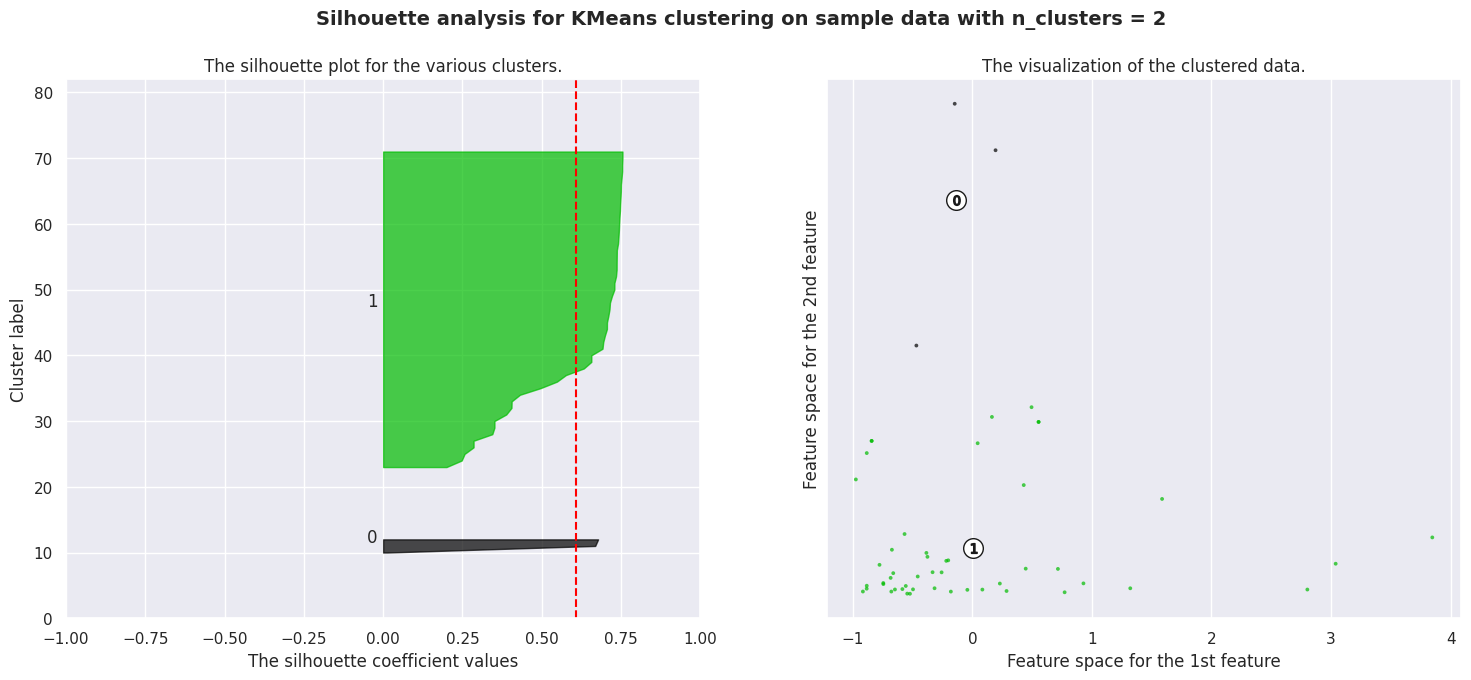

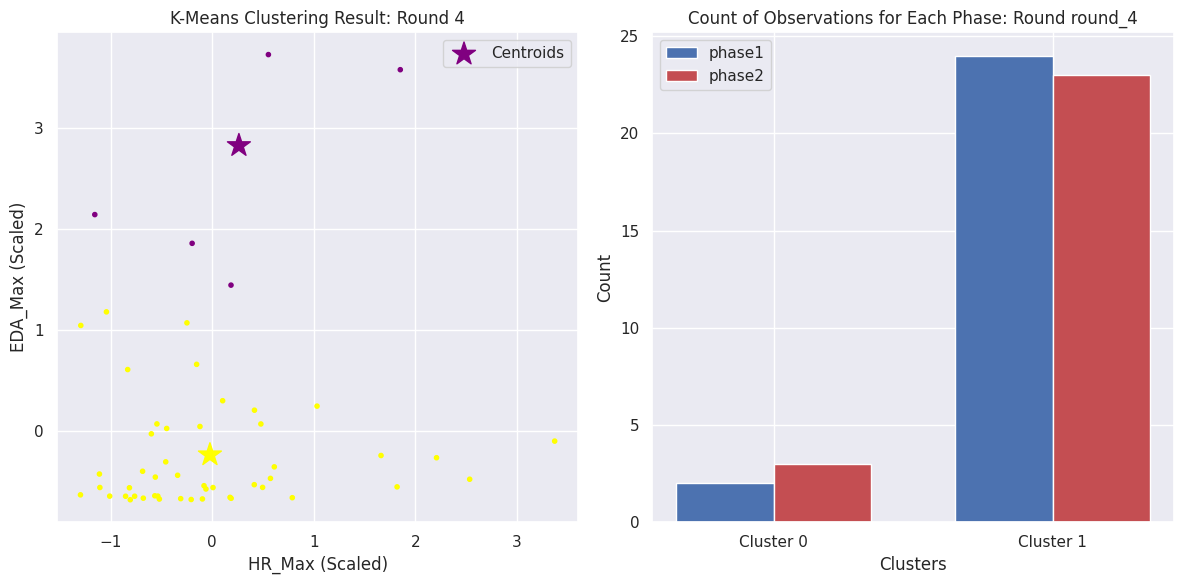

For n_clusters = 2 the average silhouette_score is:
--- 0.5476813766814799 ---


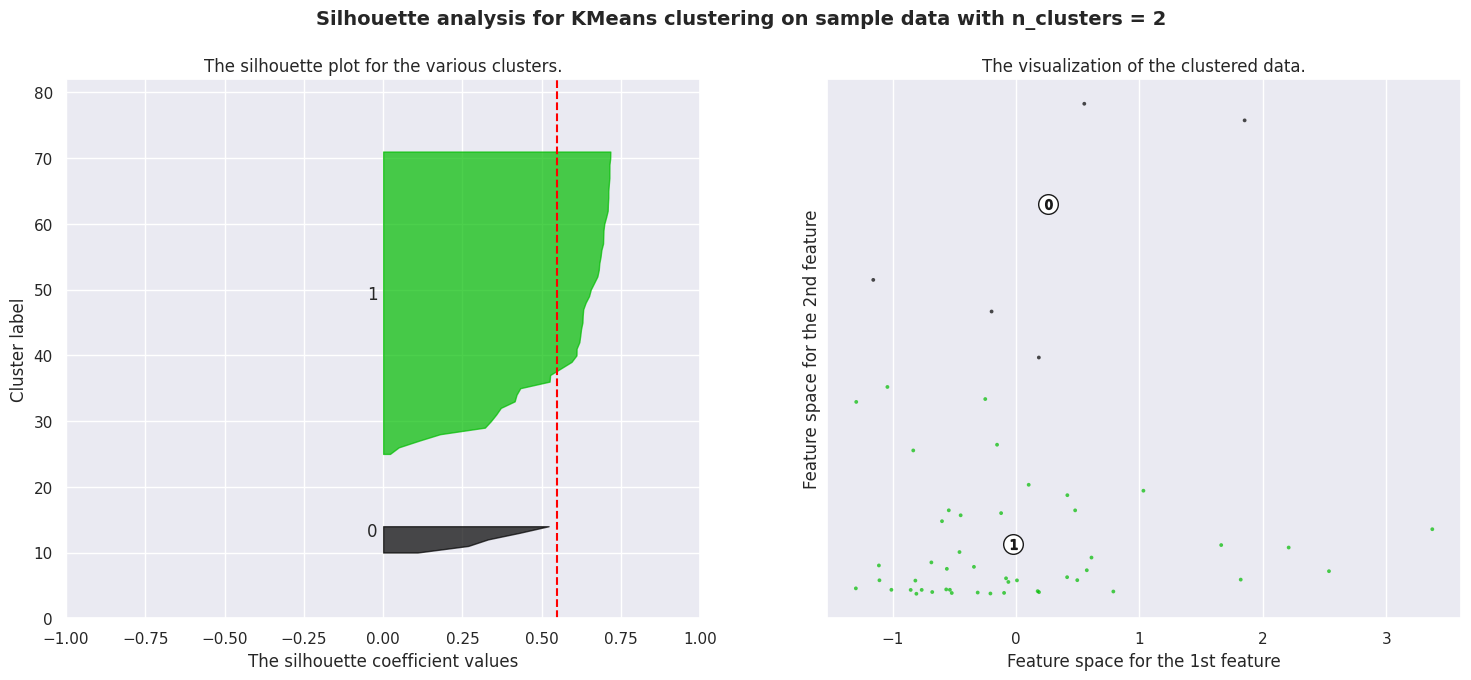

In [32]:
## Compare STD of HR and Max value of EDA (Per Round) ##

# Define color map
color_map = {'phase1': 'b', 'phase2': 'r'}

# Filter rounds to include only round 1 and round 4
filtered_rounds = ['round_1', 'round_2', 'round_3', 'round_4']

# Instantiate StandardScaler
scaler = StandardScaler()

# Iterate over each round
for current_round in filtered_rounds:
    round_data = phase1_2_data[phase1_2_data['Round'] == current_round]
    
    # Scale the data for the current round
    scaled_data = scaler.fit_transform(round_data[['HR_TD_Max', 'EDA_TD_P_Max']])
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=2, n_init=1, random_state=1, max_iter=1)
    y_pred = kmeans.fit_predict(scaled_data)
    
    # Create figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot clustering results
    axs[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=['purple' if label == 0 else 'yellow' for label in y_pred], marker='.')
    axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=['purple','yellow'], marker='*', label='Centroids')
    axs[0].set_xlabel('HR_Max (Scaled)')
    axs[0].set_ylabel('EDA_Max (Scaled)')
    axs[0].set_title(f"K-Means Clustering Result: Round {current_round[-1]}")
    axs[0].legend()
    
    # Plot count of observations for each phase within each cluster
    cluster_counts = {i: {'phase1': 0, 'phase2': 0} for i in range(len(np.unique(y_pred)))}
    
    for phase, color in color_map.items():
        phase_data = round_data[round_data['Phase'] == phase]
        for cluster in np.unique(y_pred):
            cluster_counts[cluster][phase] = np.sum(y_pred[round_data['Phase'] == phase] == cluster)
    
    cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
    phase_labels = list(color_map.keys())
    cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]
    
    bar_width = 0.35
    bar_positions = np.arange(len(cluster_labels))
    
    for i, phase in enumerate(phase_labels):
        axs[1].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)
    
    axs[1].set_xlabel('Clusters')
    axs[1].set_ylabel('Count')
    axs[1].set_title(f"Count of Observations for Each Phase: Round {current_round}")
    axs[1].set_xticks(bar_positions)
    axs[1].set_xticklabels(cluster_labels)
    axs[1].legend()
    
    plt.savefig(f"clustering_results_round_.png")

    # Show plot
    plt.tight_layout()

    plt.show()
    
    plot_silhouette(scaled_data, y_pred)

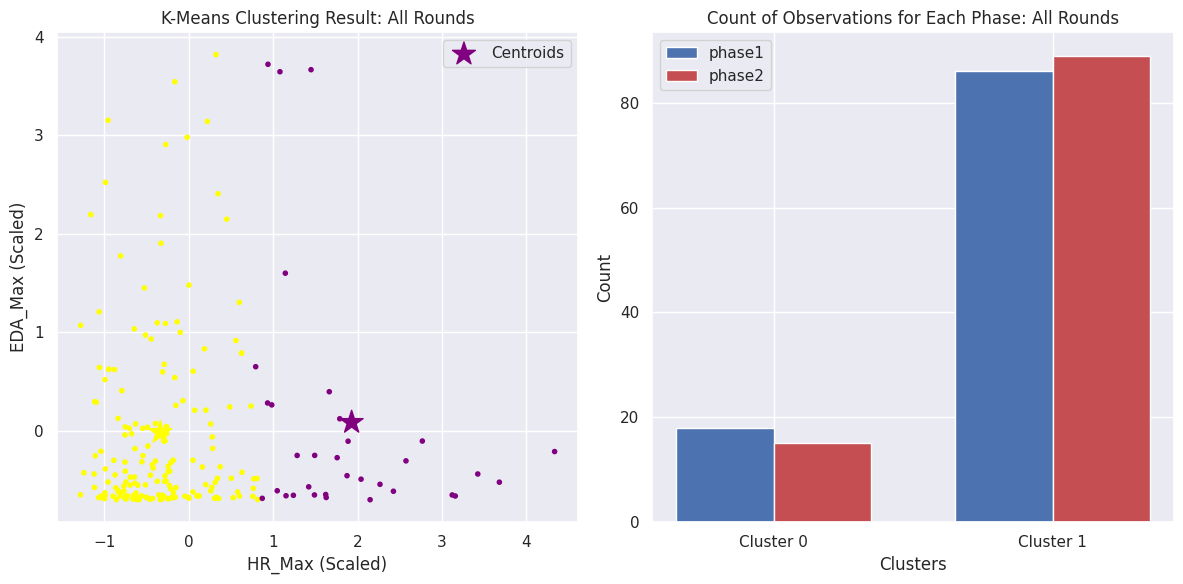

For n_clusters = 2 the average silhouette_score is:
--- 0.5040025477416263 ---


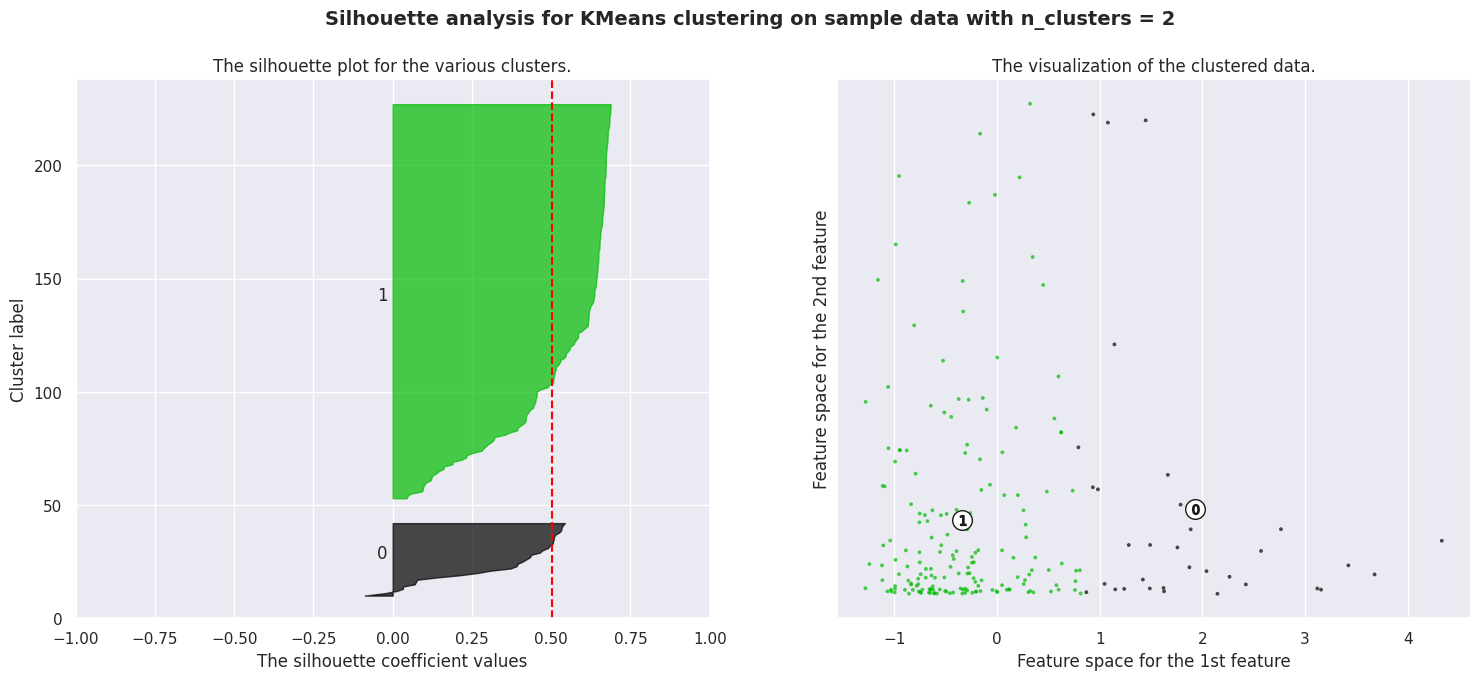

In [33]:
## Compare Max of HR and Max value of EDA (All rounds together) ##

# Concatenate data from all rounds
all_data = phase1_2_data[['HR_TD_Max', 'EDA_TD_P_Max']]
all_labels = phase1_2_data['Phase']

# Instantiate StandardScaler
scaler = StandardScaler()

# Scale the combined data
scaled_data = scaler.fit_transform(all_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=1, random_state=1, max_iter=1)
y_pred = kmeans.fit_predict(scaled_data)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot clustering results
axs[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=['purple' if label == 0 else 'yellow' for label in y_pred], marker='.')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=['purple','yellow'], marker='*', label='Centroids')
axs[0].set_xlabel('HR_Max (Scaled)')
axs[0].set_ylabel('EDA_Max (Scaled)')
axs[0].set_title("K-Means Clustering Result: All Rounds")
axs[0].legend()

# Plot count of observations for each phase within each cluster
cluster_counts = {i: {'phase1': 0, 'phase2': 0} for i in range(len(np.unique(y_pred)))}

for phase, color in color_map.items():
    for cluster in np.unique(y_pred):
        cluster_counts[cluster][phase] = np.sum((y_pred == cluster) & (all_labels == phase))

cluster_labels = [f'Cluster {i}' for i in range(len(np.unique(y_pred)))]
phase_labels = list(color_map.keys())
cluster_values = [[cluster_counts[i][phase] for phase in phase_labels] for i in range(len(np.unique(y_pred)))]

bar_width = 0.35
bar_positions = np.arange(len(cluster_labels))

for i, phase in enumerate(phase_labels):
    axs[1].bar(bar_positions - bar_width/2 + i*bar_width, [values[i] for values in cluster_values], bar_width, color=color_map[phase], label=phase)

axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Count')
axs[1].set_title("Count of Observations for Each Phase: All Rounds")
axs[1].set_xticks(bar_positions)
axs[1].set_xticklabels(cluster_labels)
axs[1].legend()

plt.tight_layout()

# Save plot
plt.savefig("clustering_results_all_rounds.png")

# Show plot
plt.show()

plot_silhouette(scaled_data, y_pred)

These are a few examples. For comparing other variables, you just need to change the name of the variables selected.